<a href="https://colab.research.google.com/github/SaikatGhosh94/MachineLearningCourse/blob/main/Hands_on_practice/RandomForrest/03_Random_Forrest_Regression_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("rock_density_xray.csv")

In [4]:
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [5]:
df.columns = ['Signal','Density']

In [6]:
X = df['Signal']
y = df['Density']

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [9]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.

In [10]:
X = df['Signal'].values.reshape(-1,1)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [12]:
lr_model.fit(X_train,y_train)

LinearRegression()

In [13]:
lr_pred = lr_model.predict(X_test)

In [14]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mean_absolute_error(y_test,lr_pred)

0.22743045526818492

In [15]:
np.sqrt(mean_squared_error(y_test,lr_pred))

np.float64(0.2789327760701736)

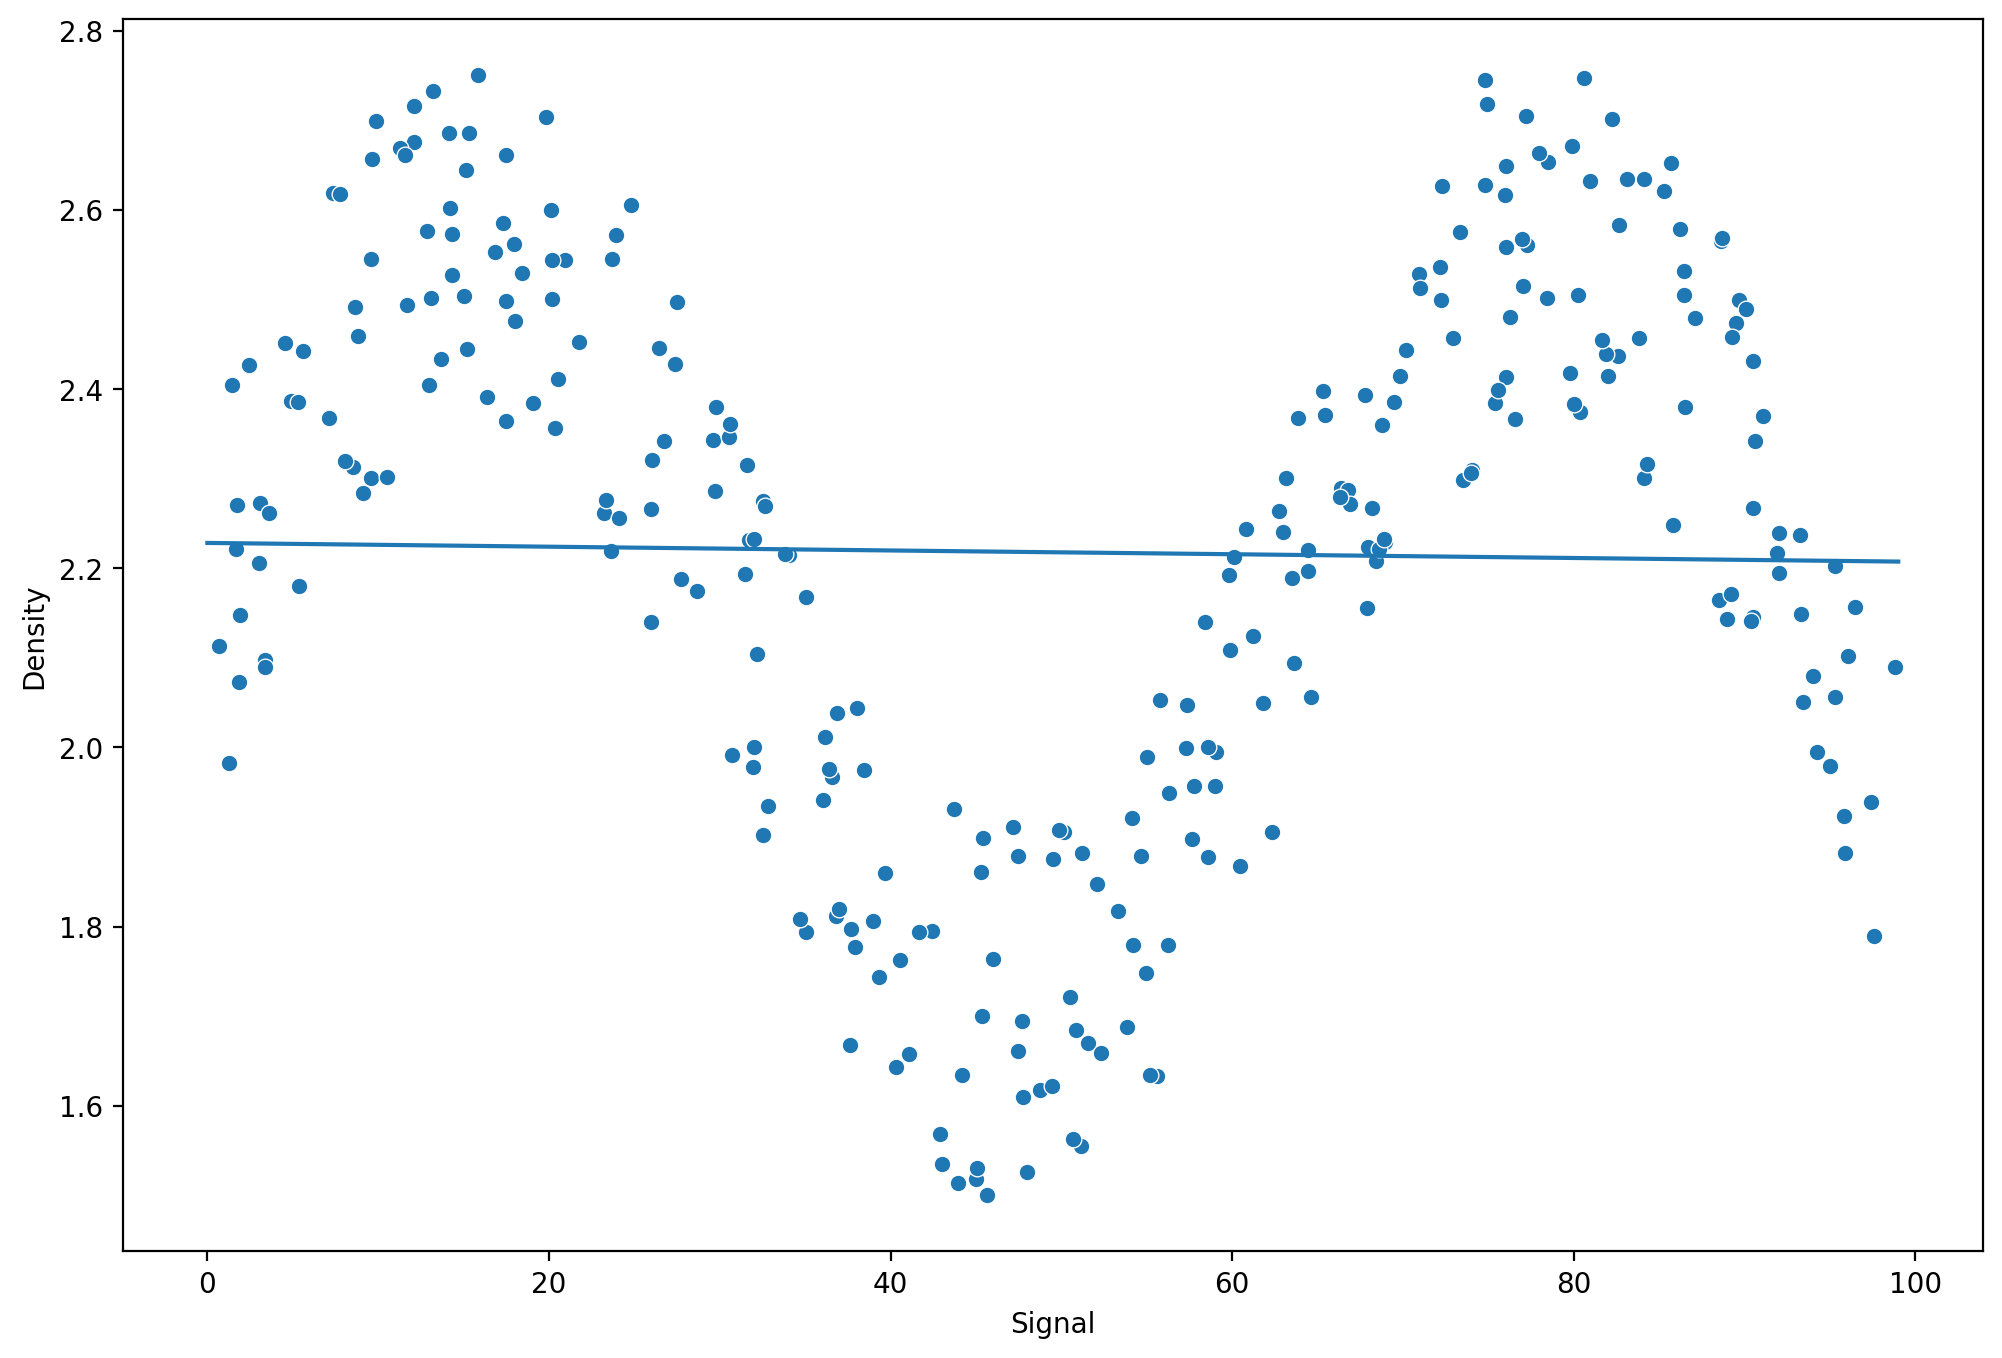

In [18]:
plt.figure(figsize=(12,8),dpi=200)
sns.scatterplot(x='Signal',y='Density',data=df)
signal_range = np.arange(0,100)
signal_pred = lr_model.predict(signal_range.reshape(-1,1))
plt.plot(signal_range,signal_pred)

In [19]:
def run_model(model,X_train,X_test,y_train,y_test):
  model.fit(X_train,y_train)
  preds = model.predict(X_test)
  rmse = np.sqrt(mean_squared_error(y_test,preds))
  mae = mean_absolute_error(y_test,preds)

  print(f'RMSE : {rmse}')
  print(f'MAE : {mae}')

  plt.figure(figsize=(12,8),dpi=200)
  sns.scatterplot(x='Signal',y='Density',data=df)
  signal_range = np.arange(0,100)
  signal_pred = model.predict(signal_range.reshape(-1,1))
  plt.plot(signal_range,signal_pred)

RMSE : 0.2789327760701736
MAE : 0.22743045526818492


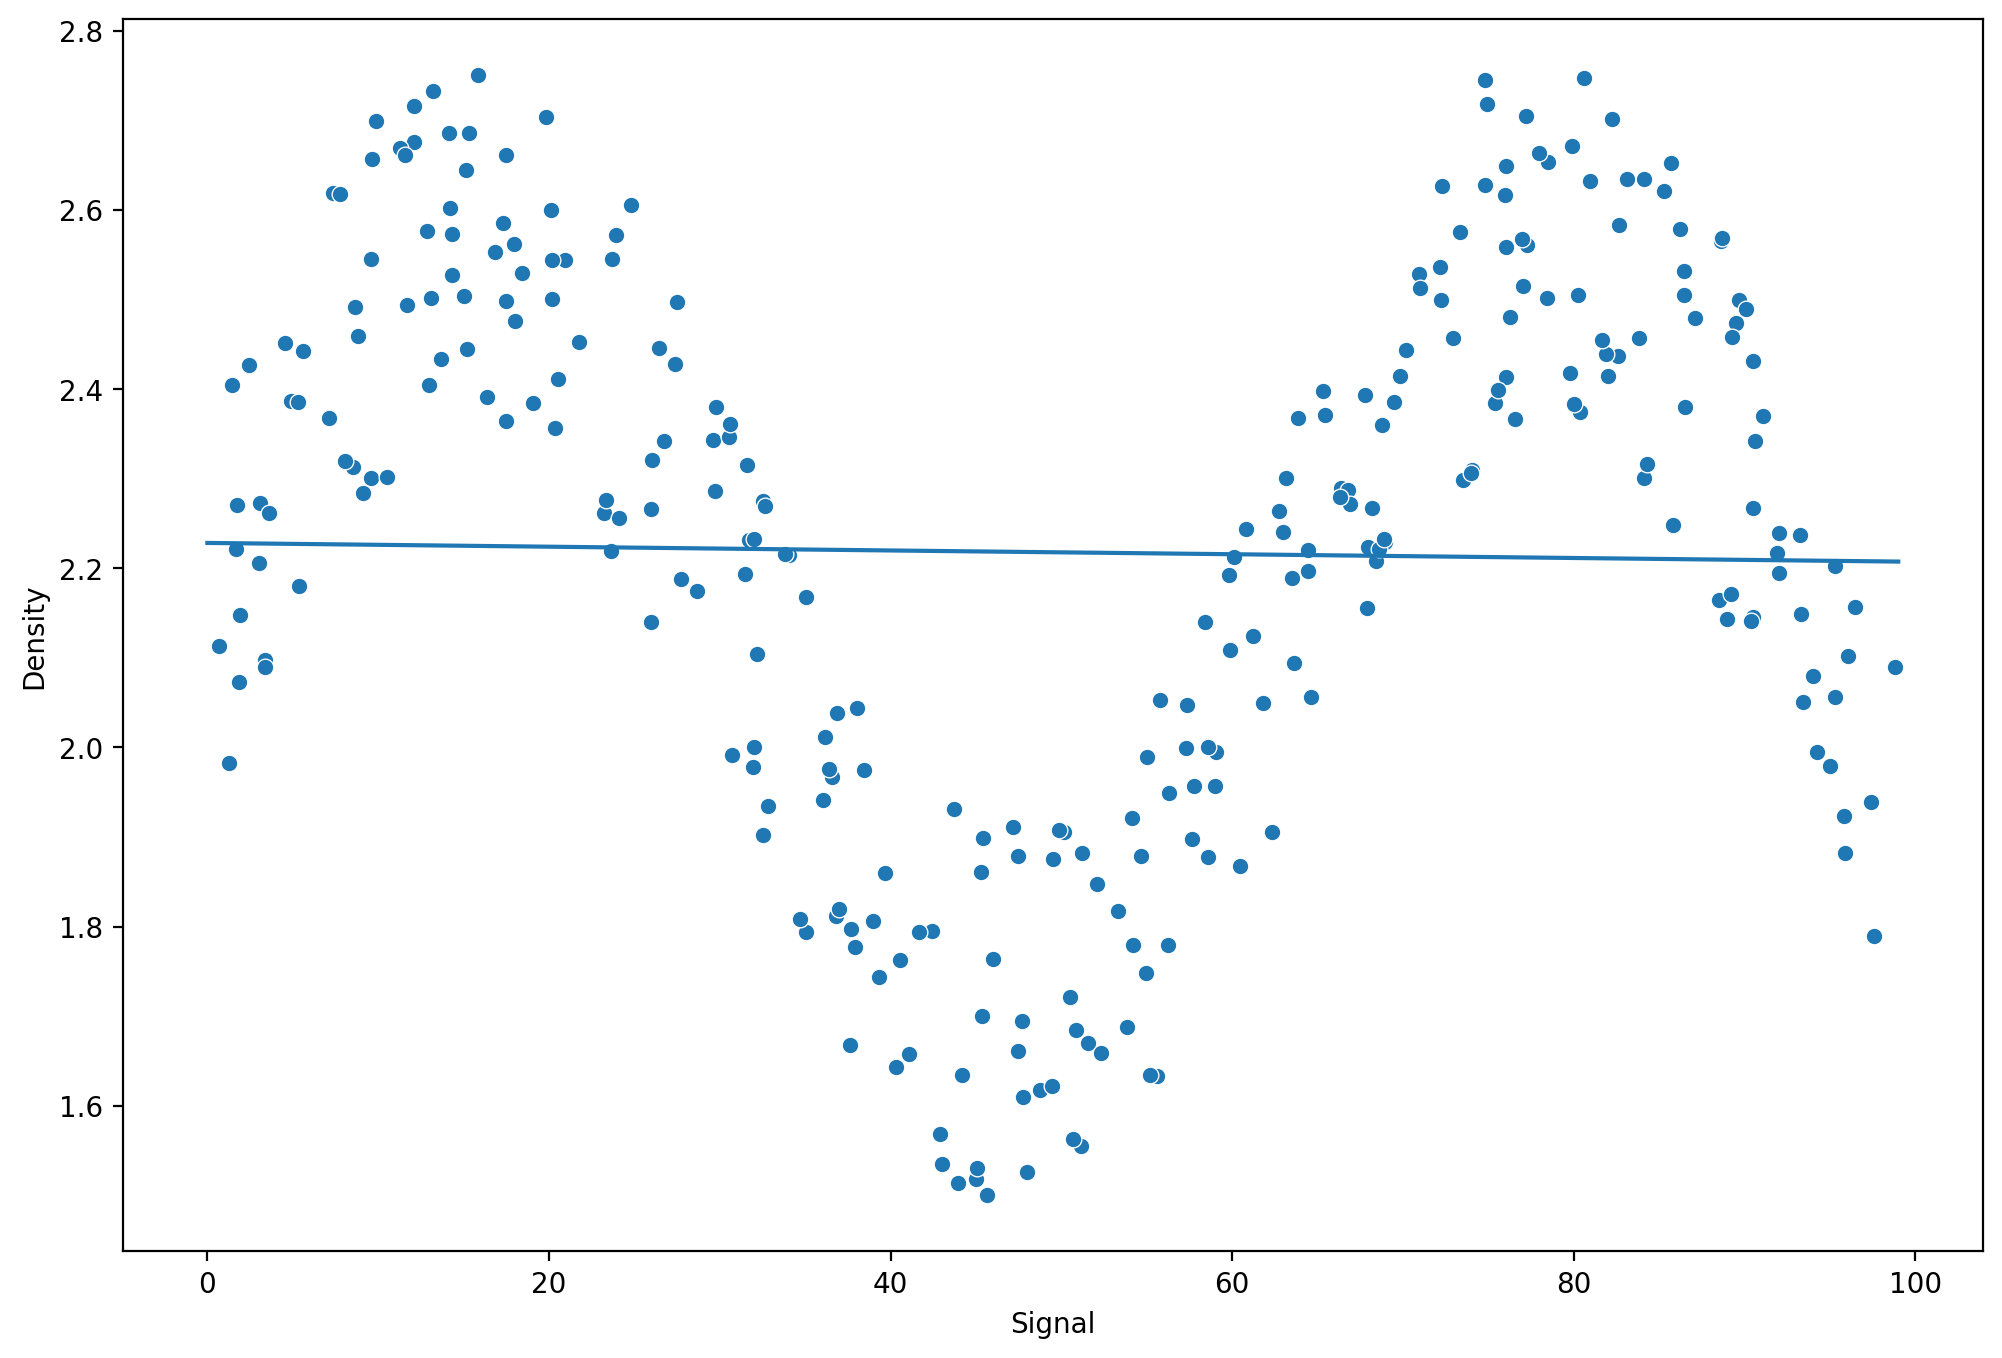

In [20]:
#Linear Regression
model = LinearRegression()
run_model(model,X_train,X_test,y_train,y_test)

RMSE : 0.2842763839300096
MAE : 0.23719091454916075


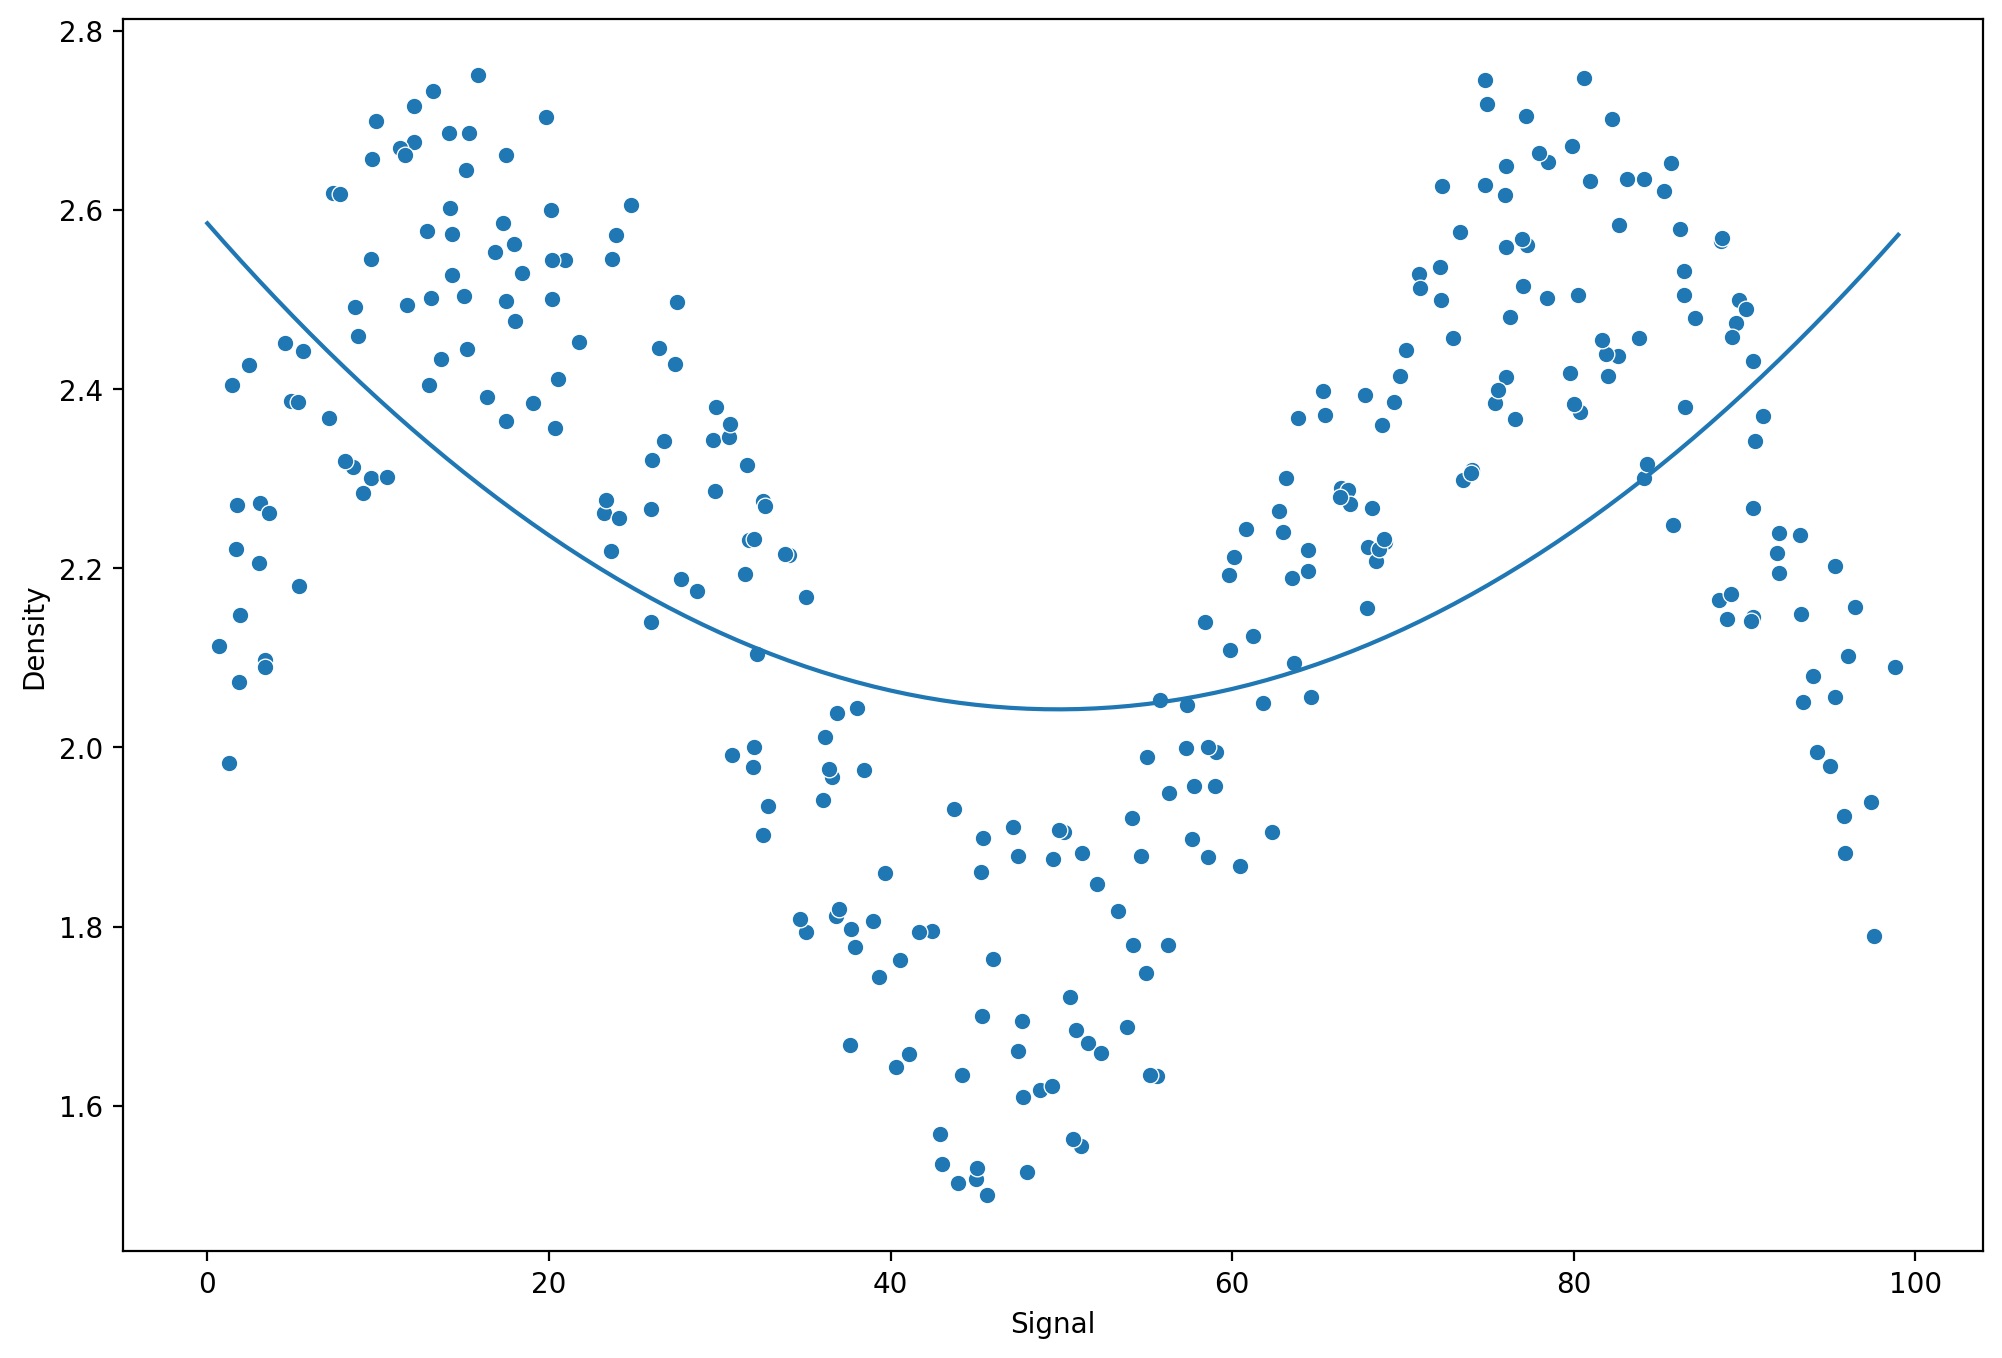

In [21]:
#Polynomial Regression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

pipe = make_pipeline(PolynomialFeatures(degree=2),LinearRegression())

run_model(pipe,X_train,X_test,y_train,y_test)

RMSE : 0.14028299963274693
MAE : 0.12309845871328914


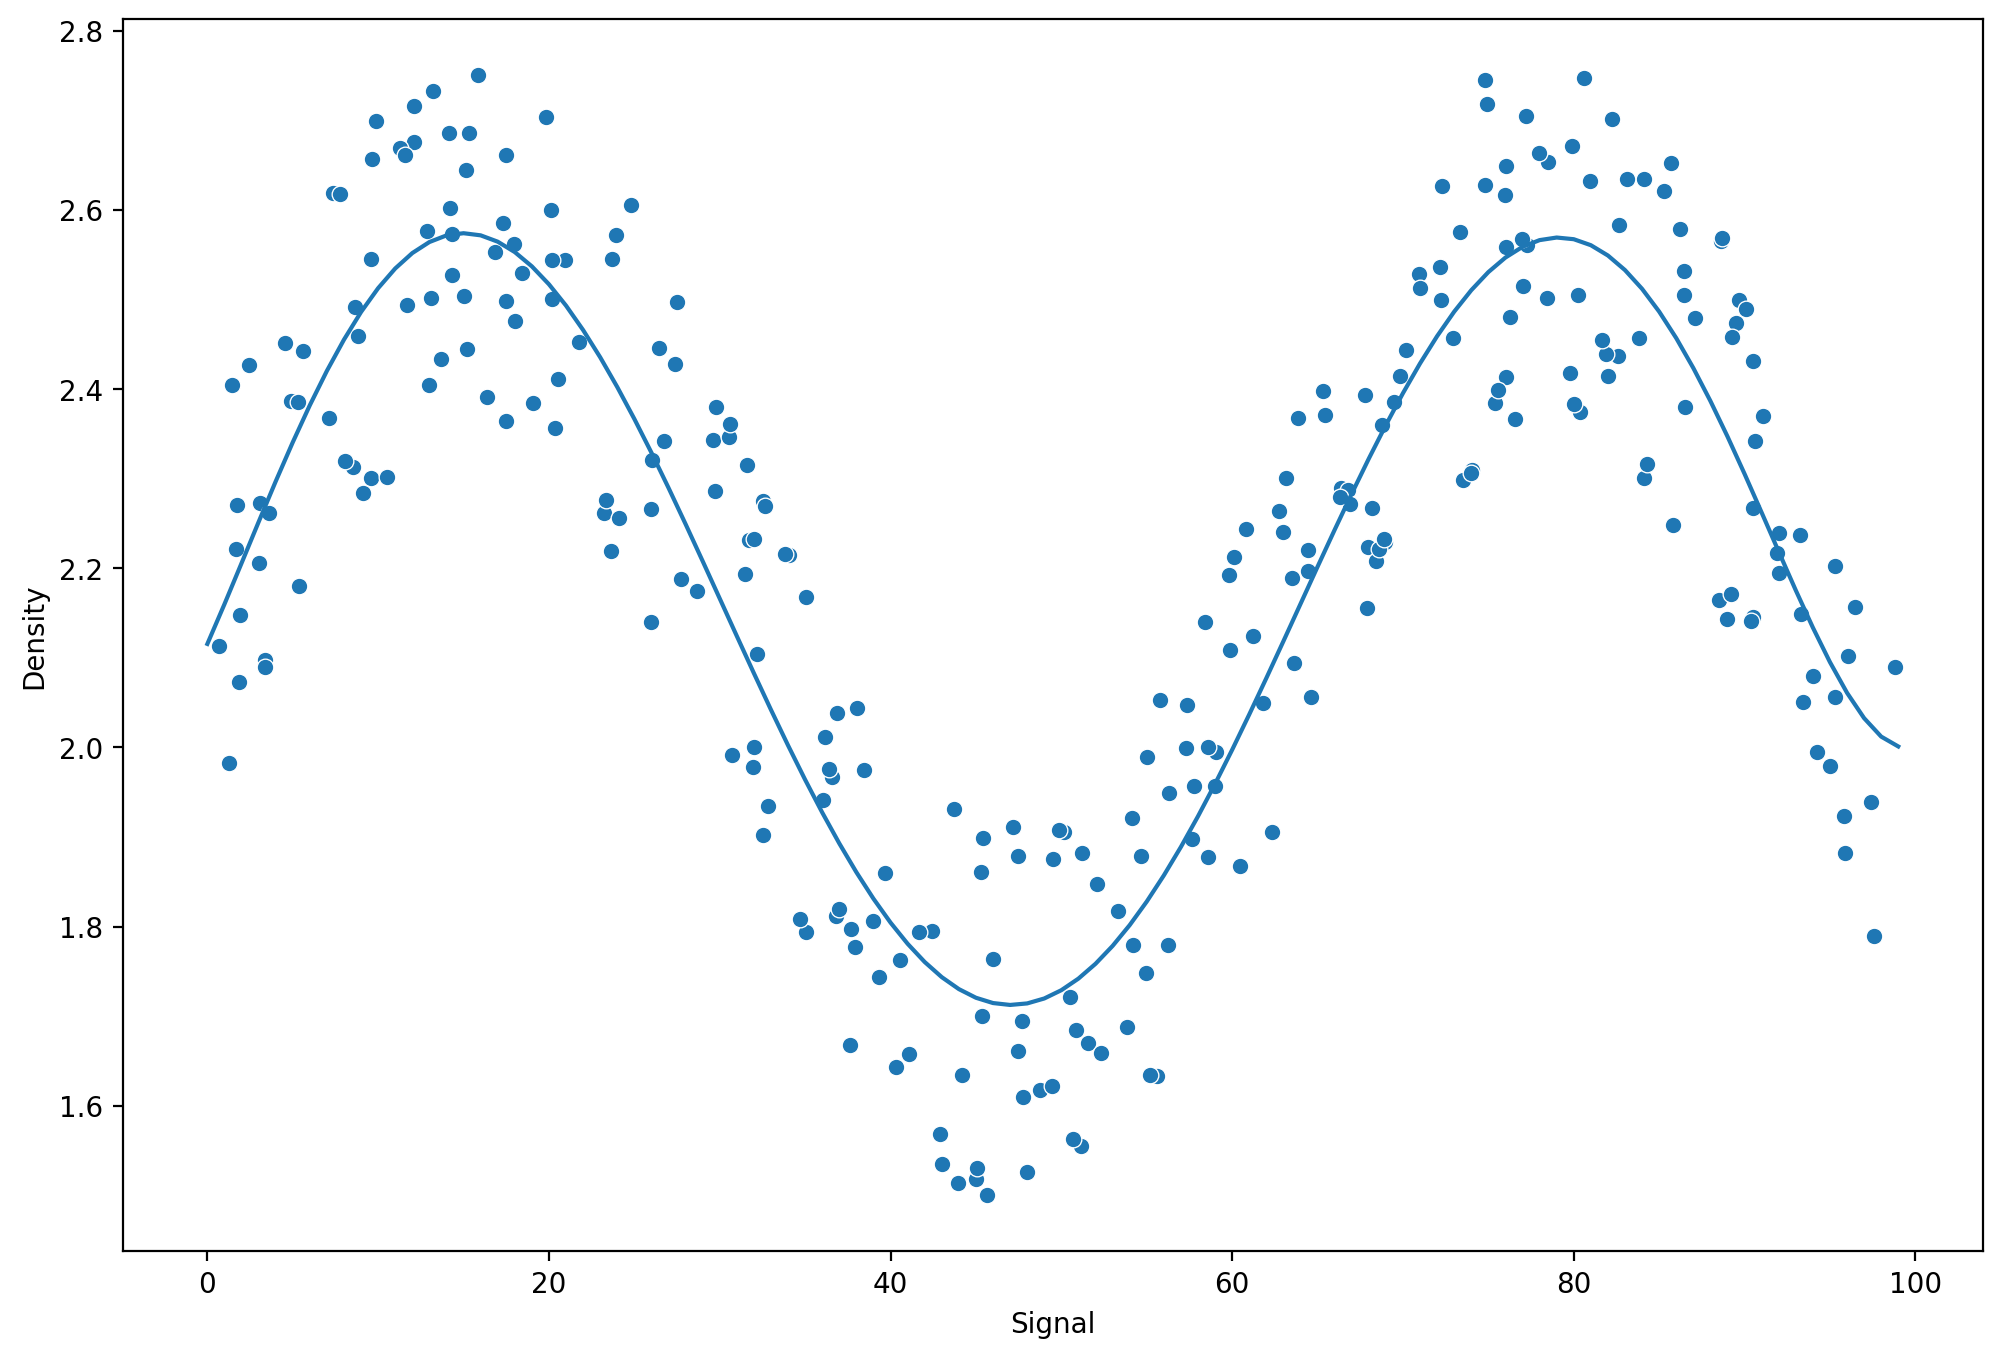

In [22]:
pipe = make_pipeline(PolynomialFeatures(degree=6),LinearRegression())

run_model(pipe,X_train,X_test,y_train,y_test)

RMSE : 0.16520828197645798
MAE : 0.13102986428081623
RMSE : 0.14516199020256743
MAE : 0.12637237801280085
RMSE : 0.13500627931123657
MAE : 0.11850108352755381
RMSE : 0.14481027111661535
MAE : 0.1277589348945053
RMSE : 0.15674264118801523
MAE : 0.13438554321265428


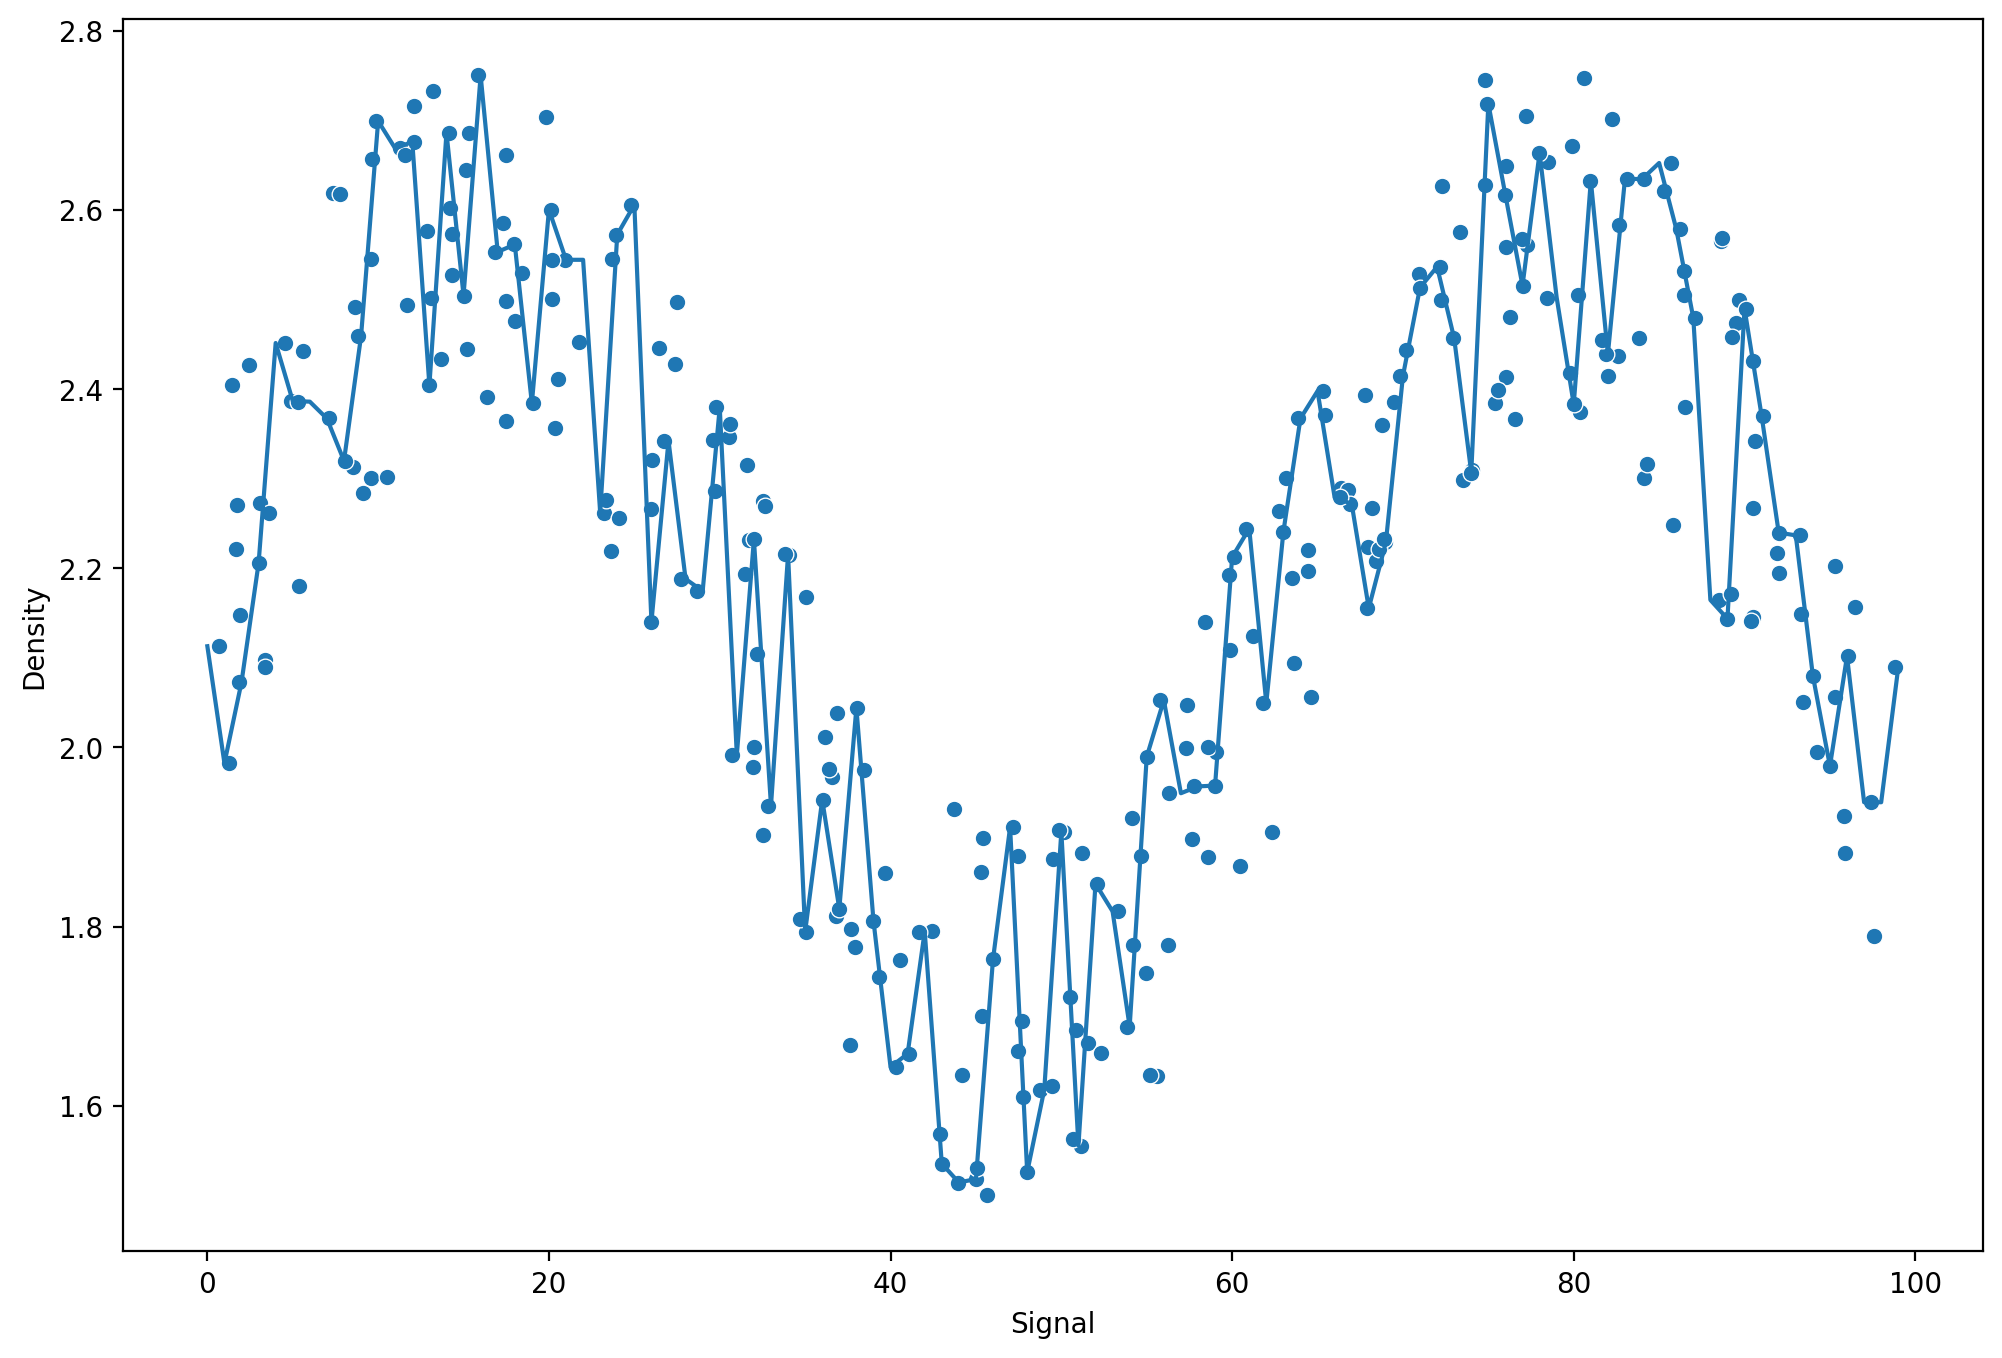

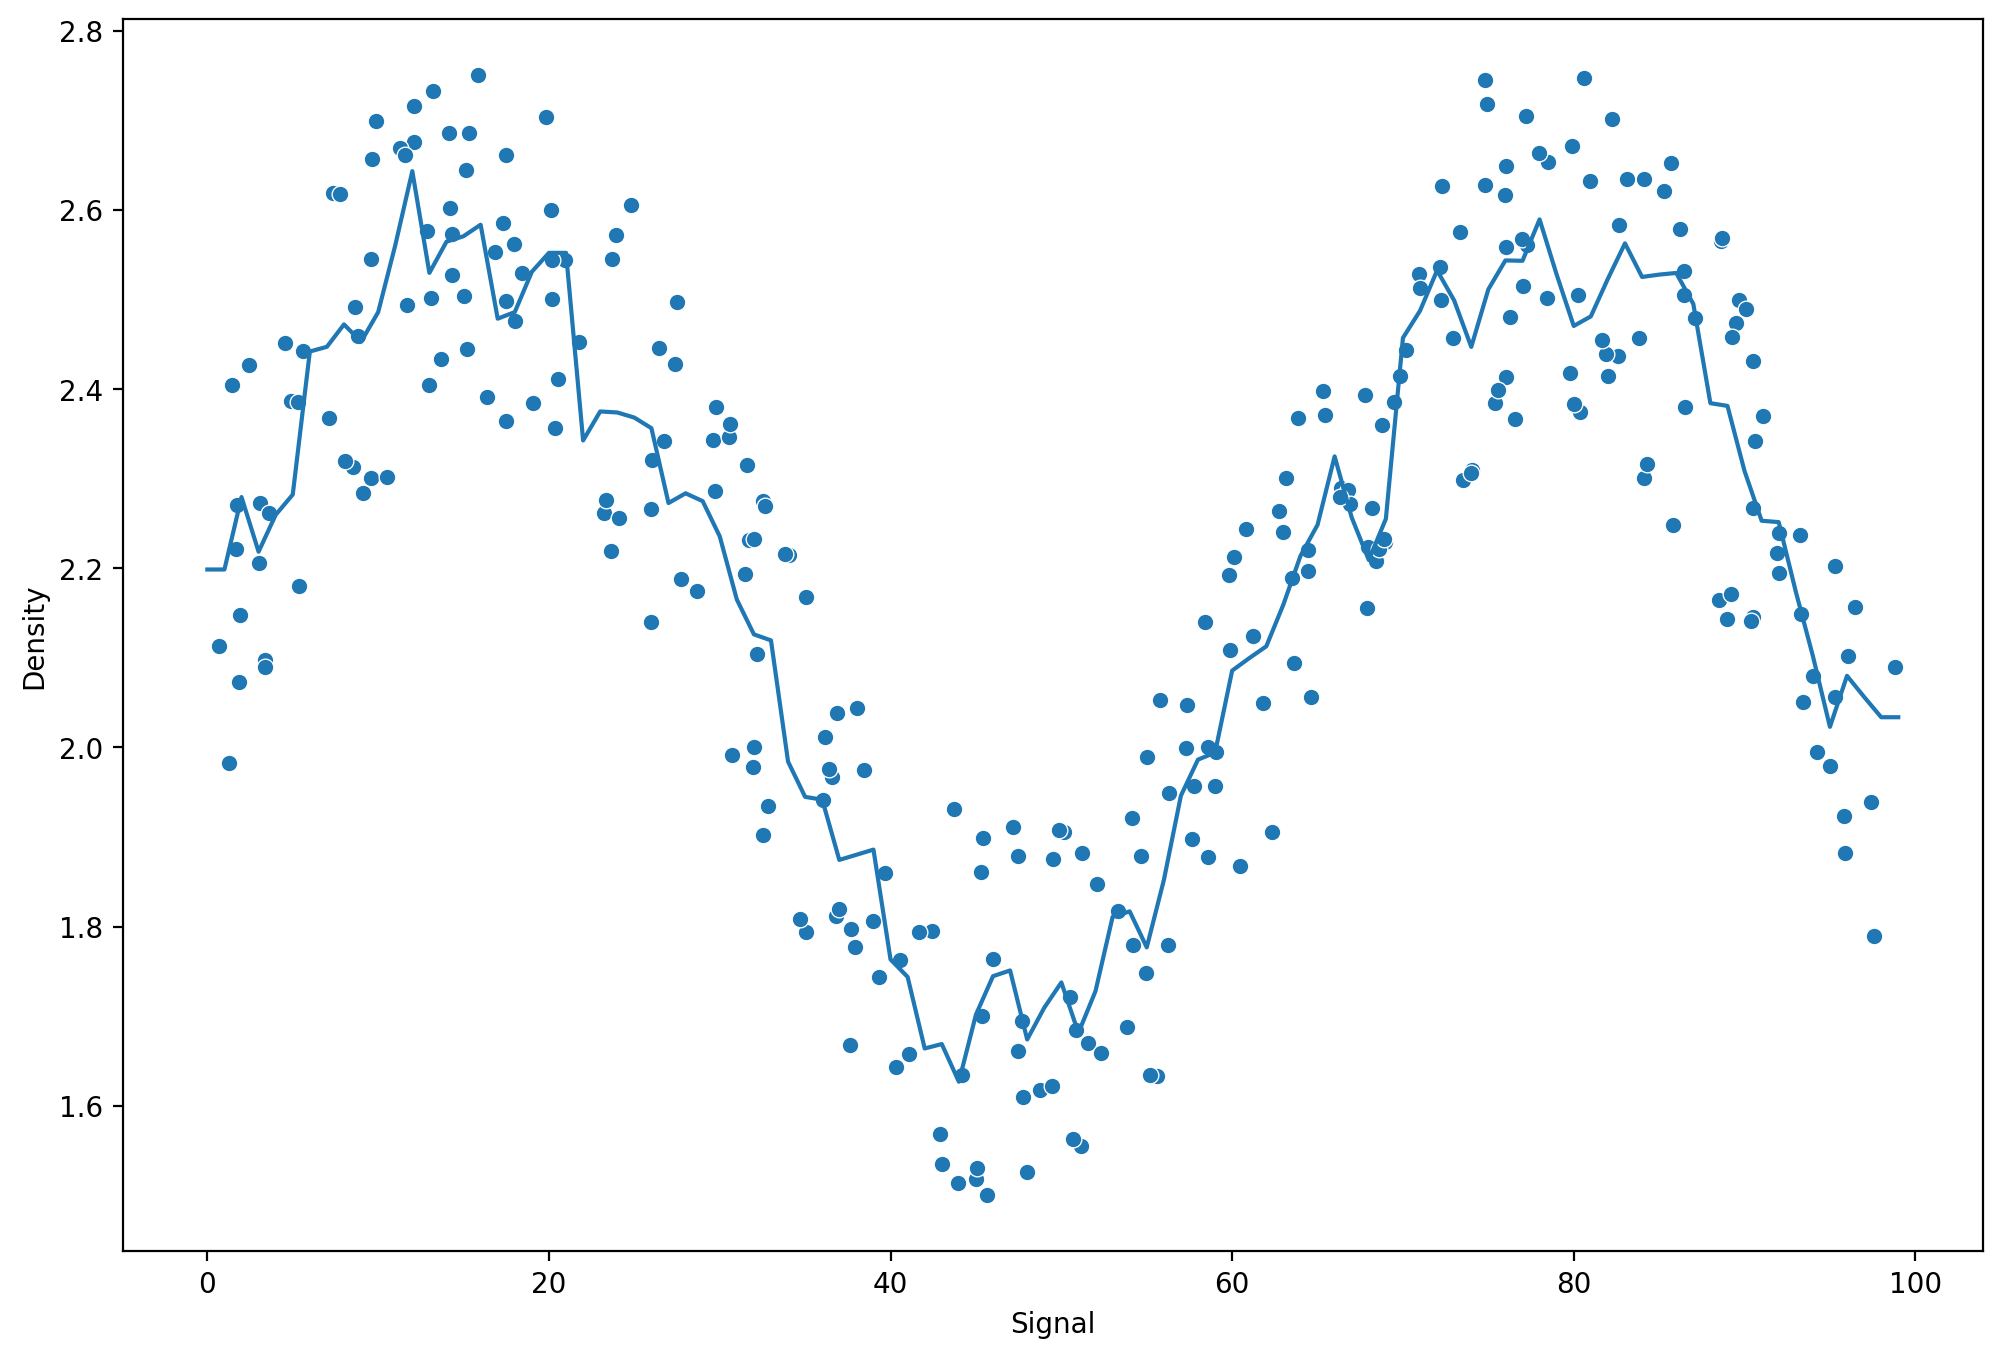

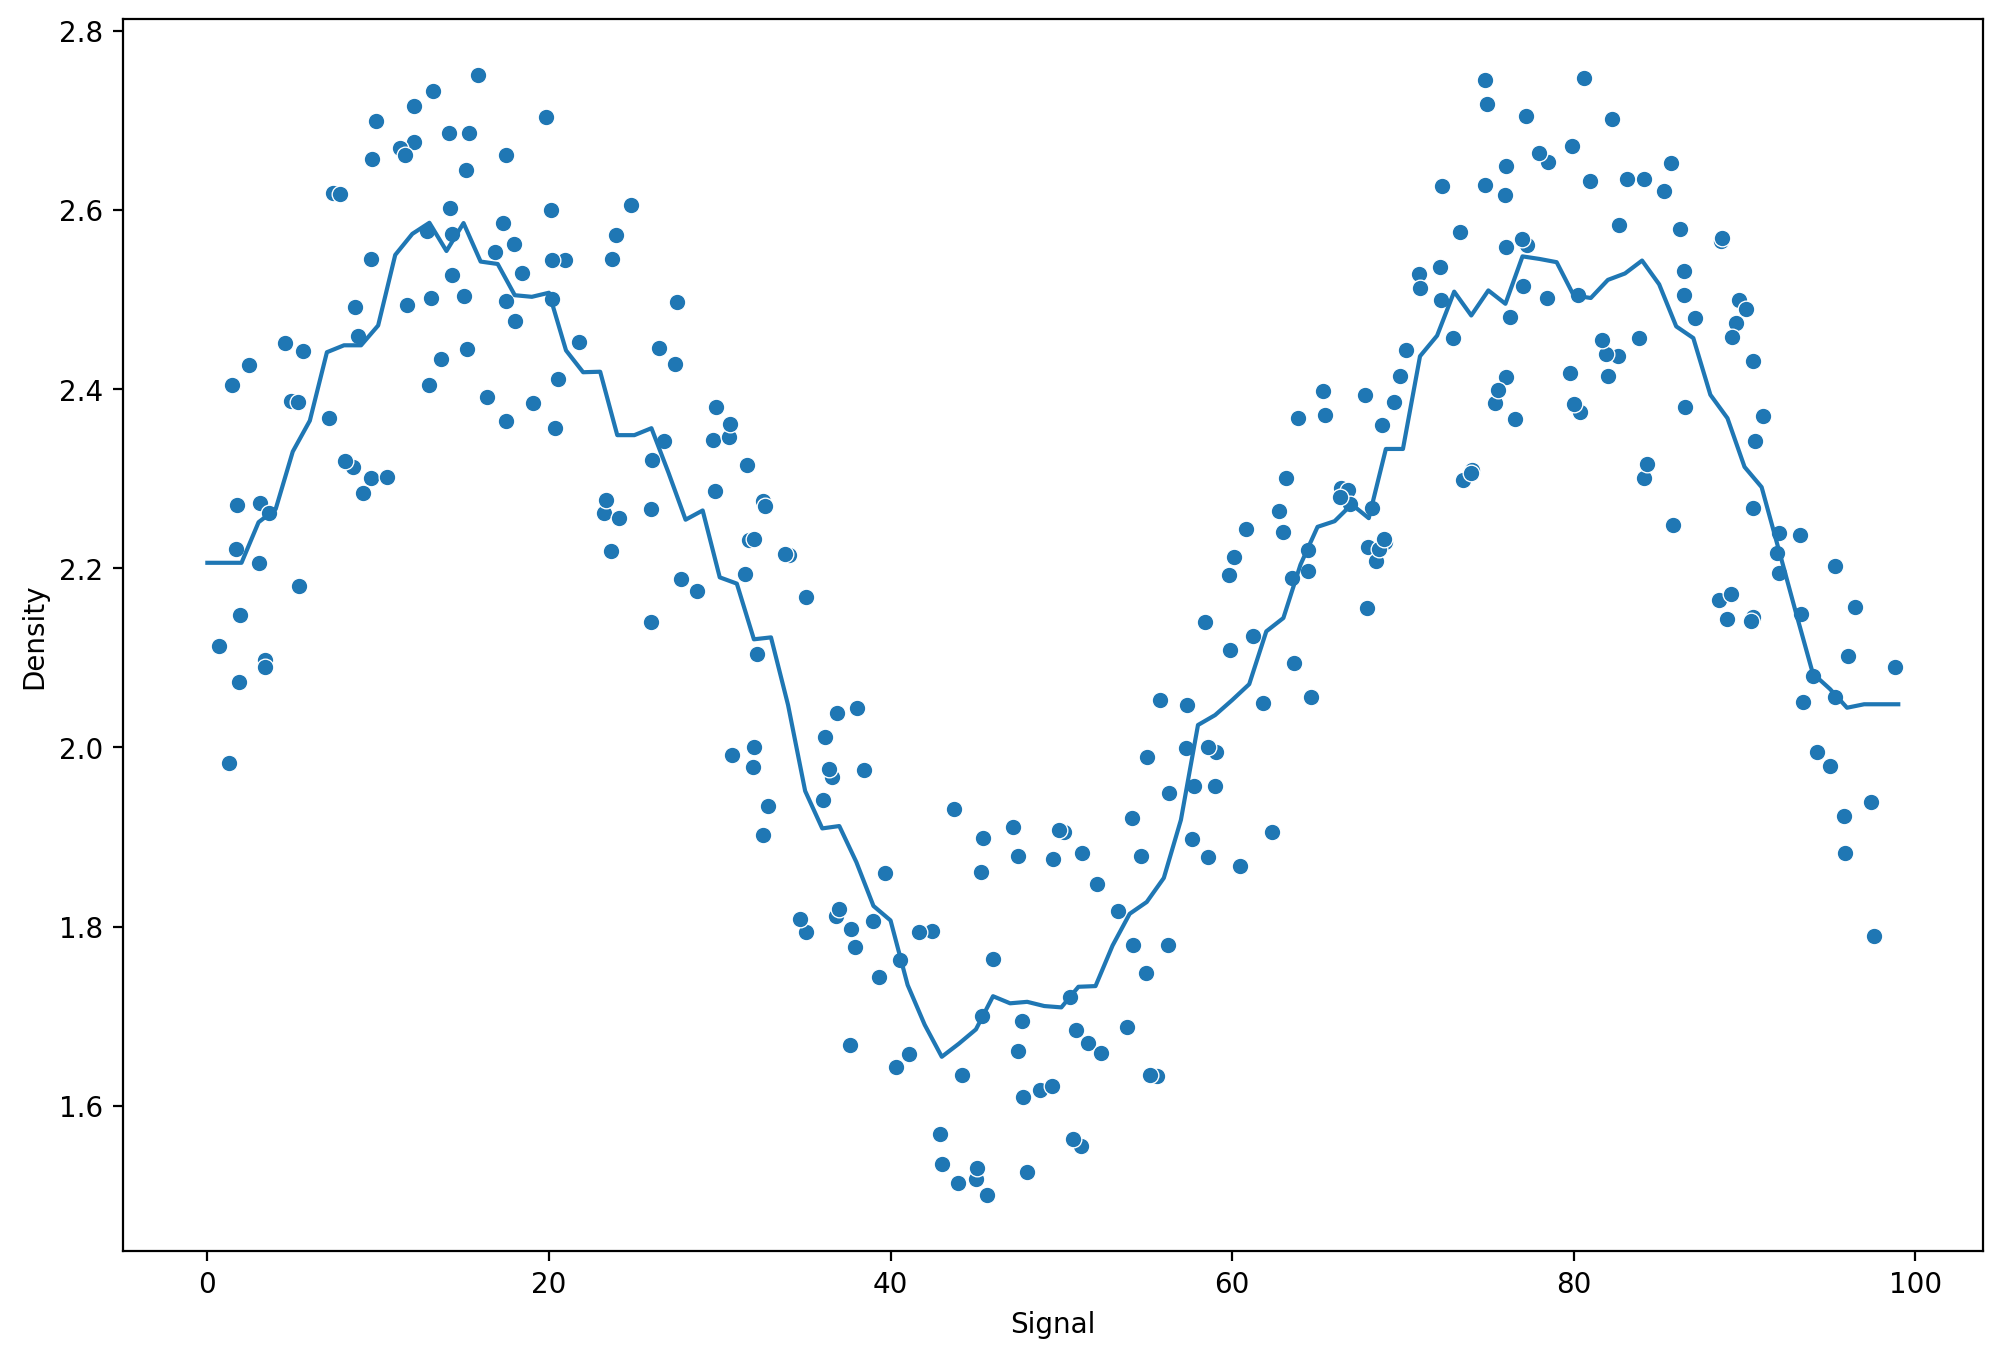

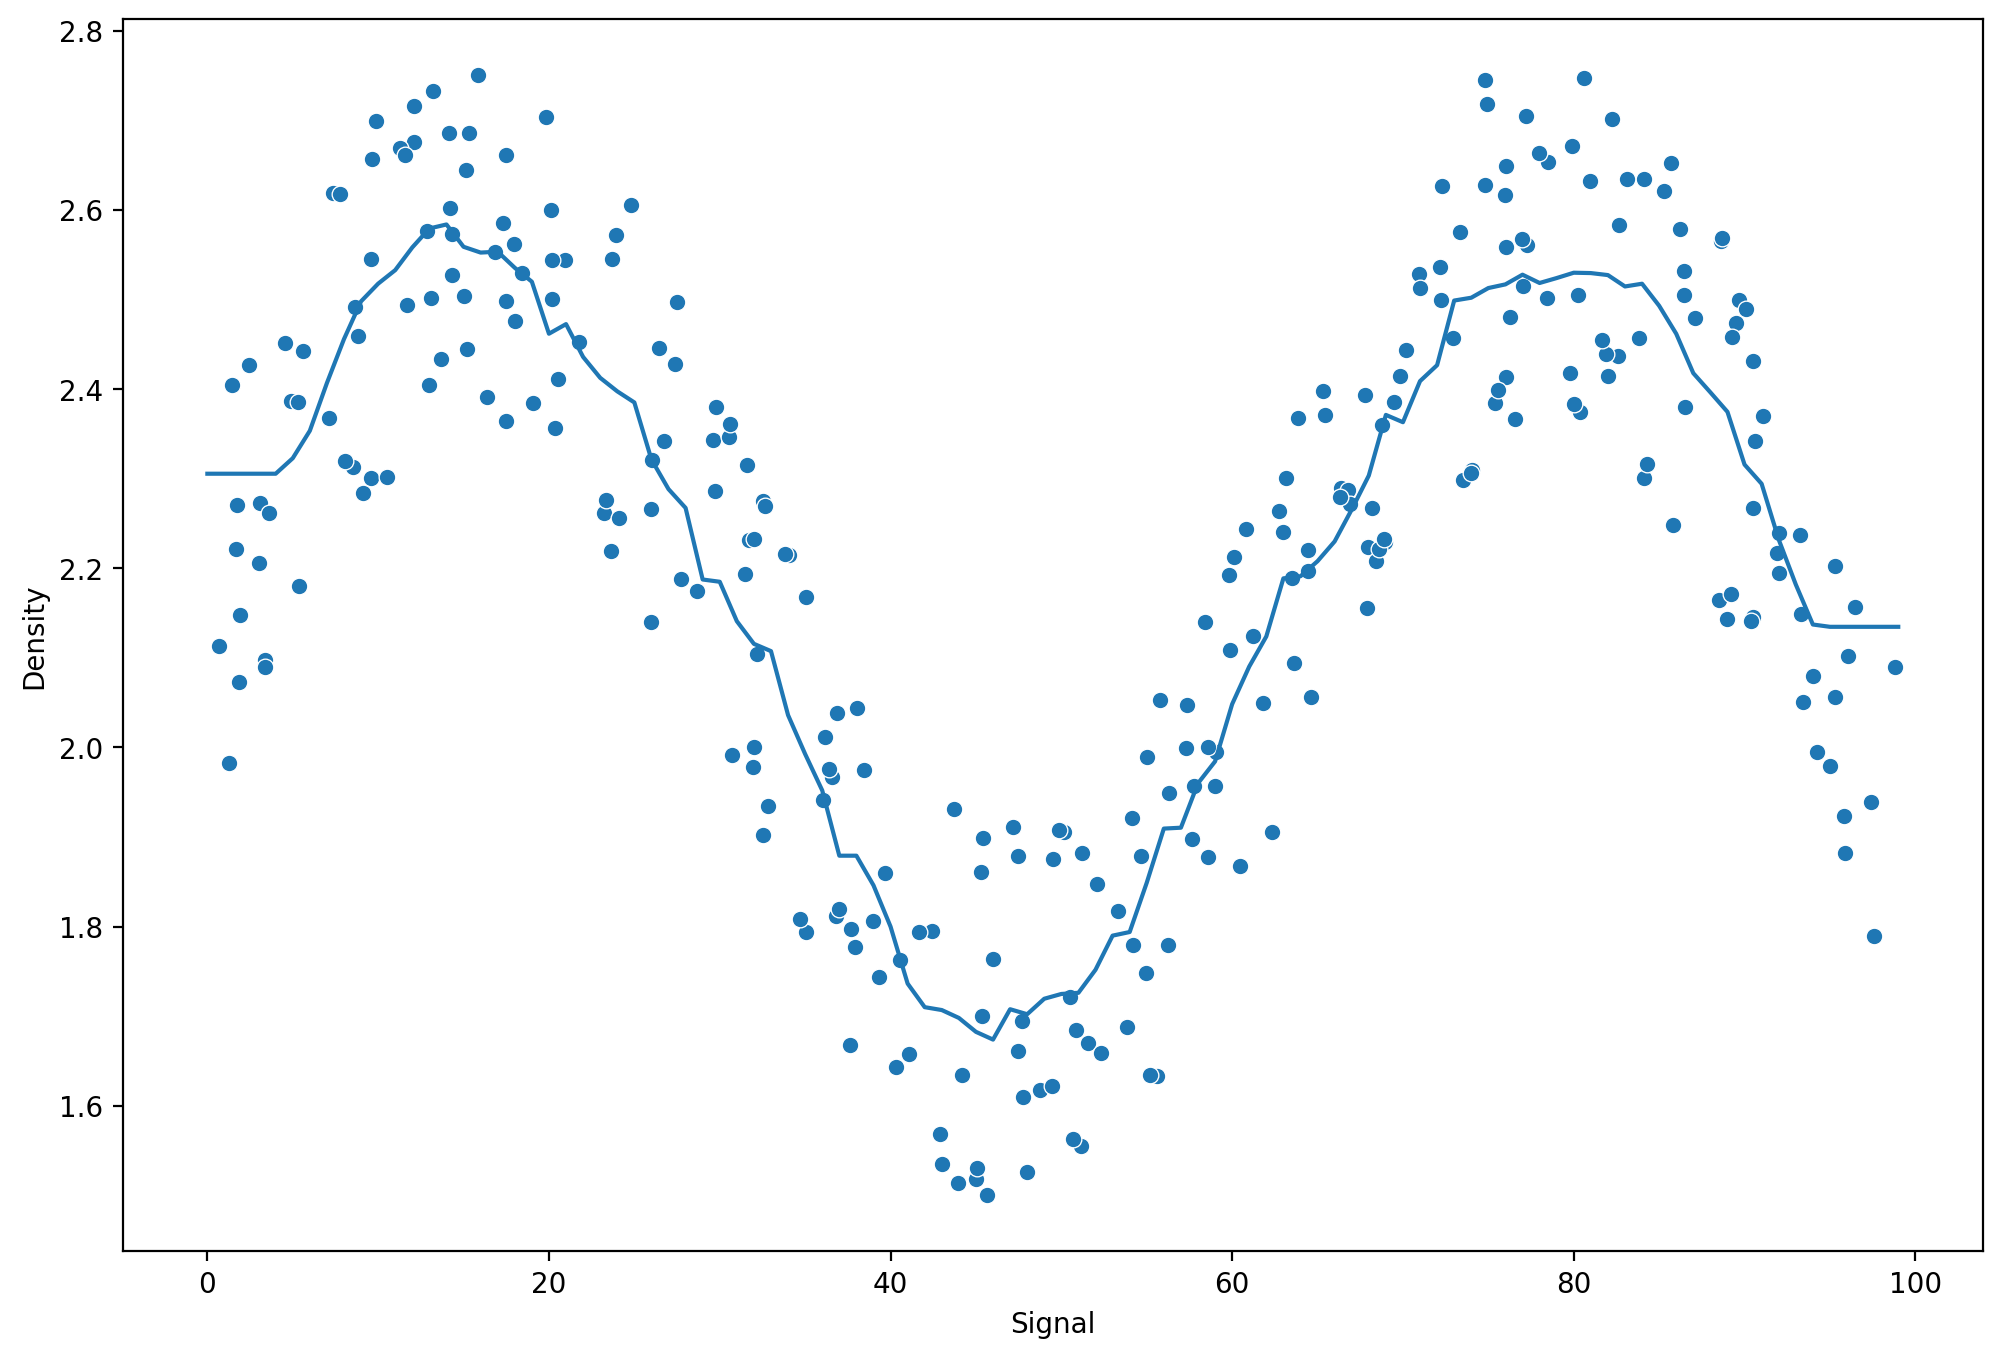

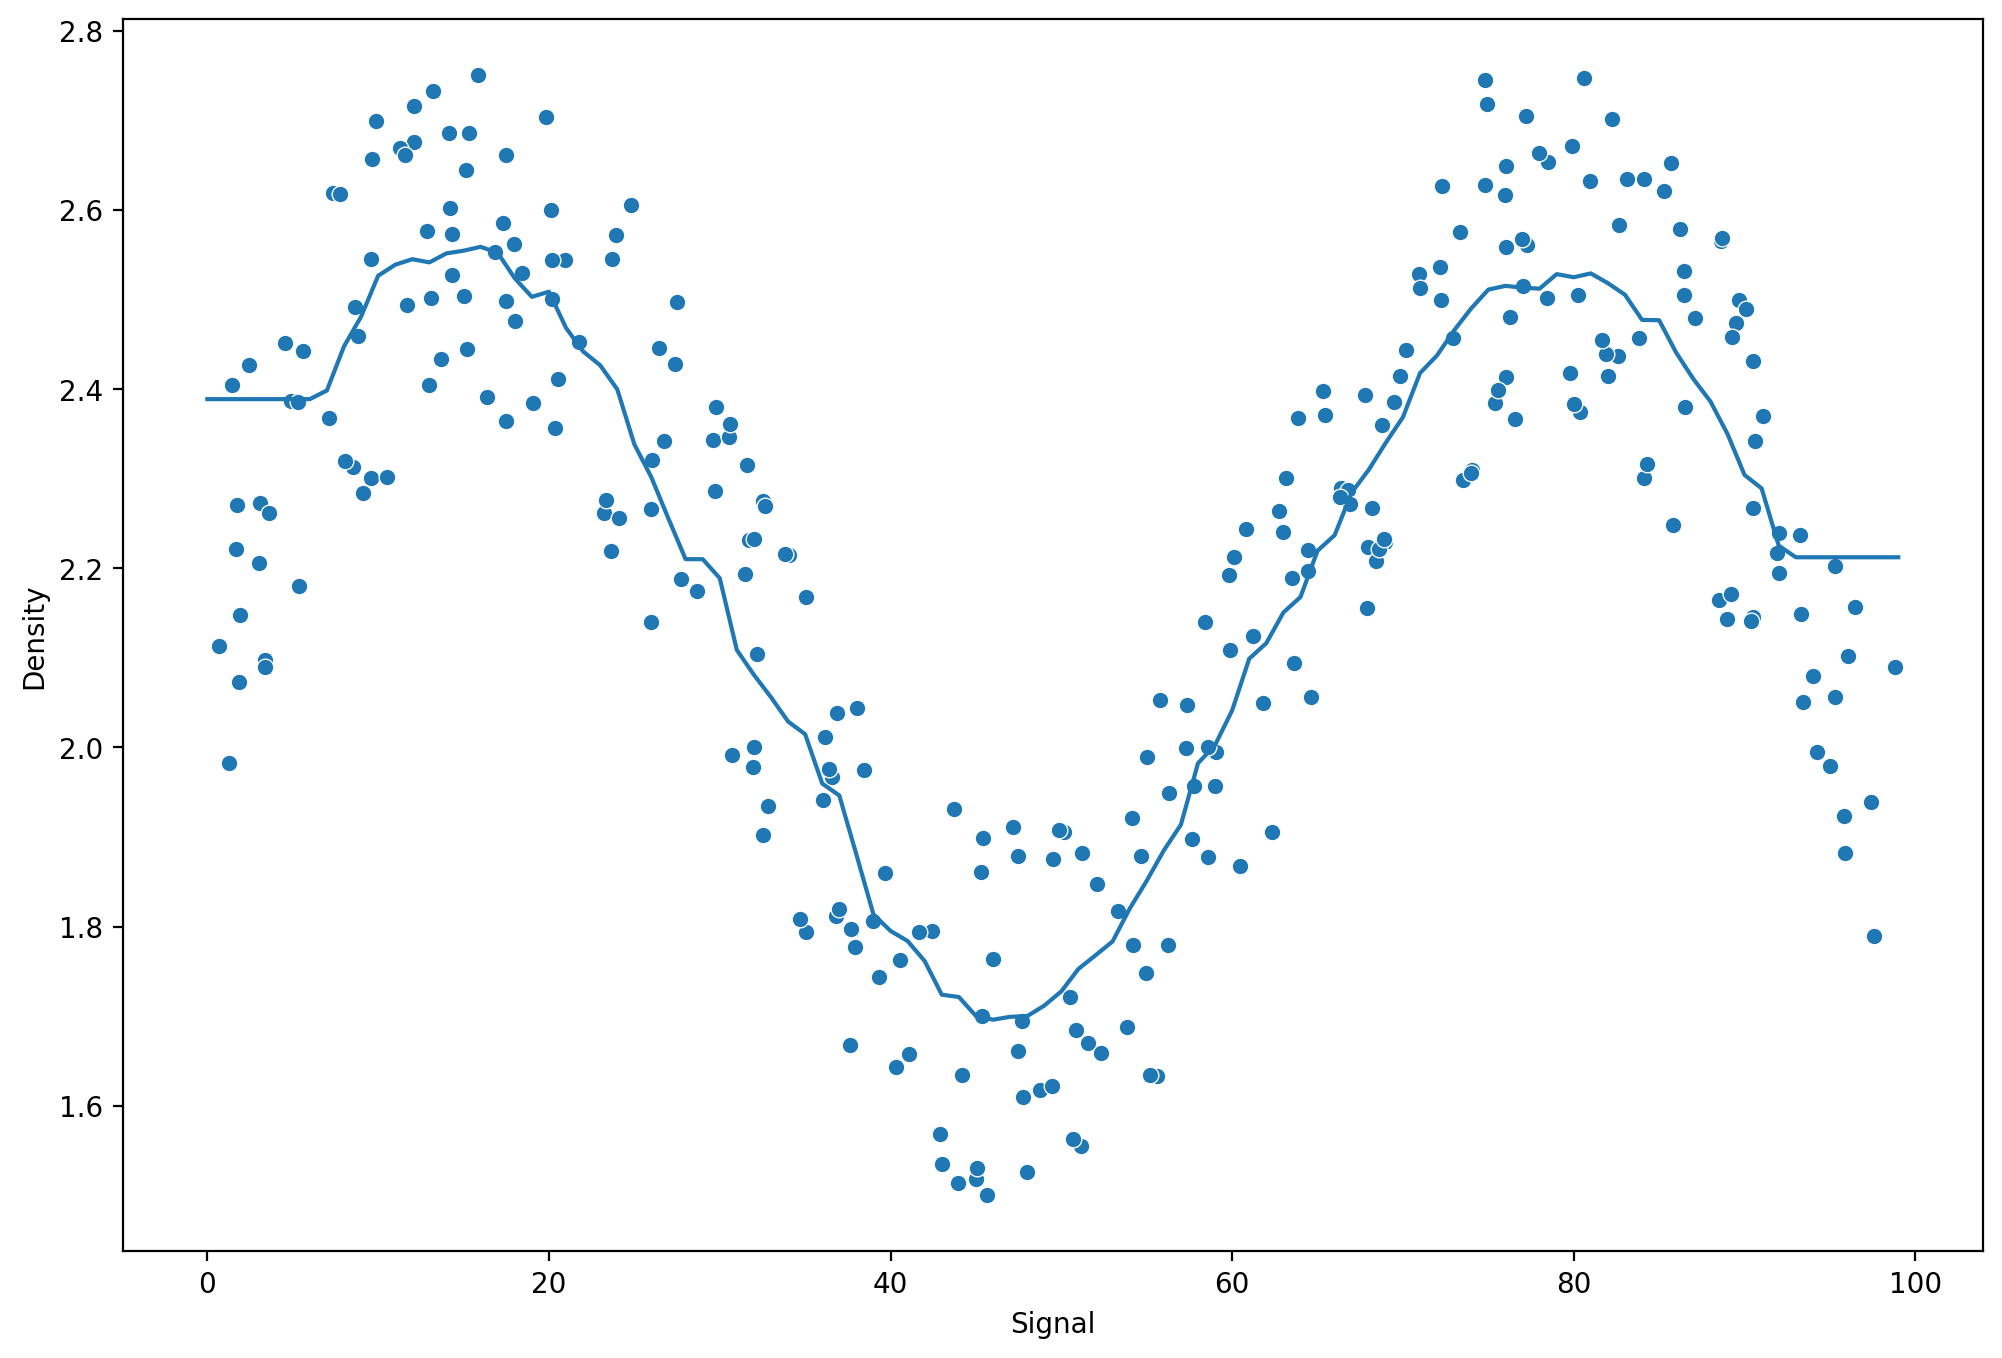

In [23]:
#KNN
from sklearn.neighbors import KNeighborsRegressor
k_values =[1,5,10,20,30]
for k in k_values:
  model = KNeighborsRegressor(n_neighbors=k)
  run_model(model,X_train,X_test,y_train,y_test)

RMSE : 0.16520828197645798
MAE : 0.13102986428081623


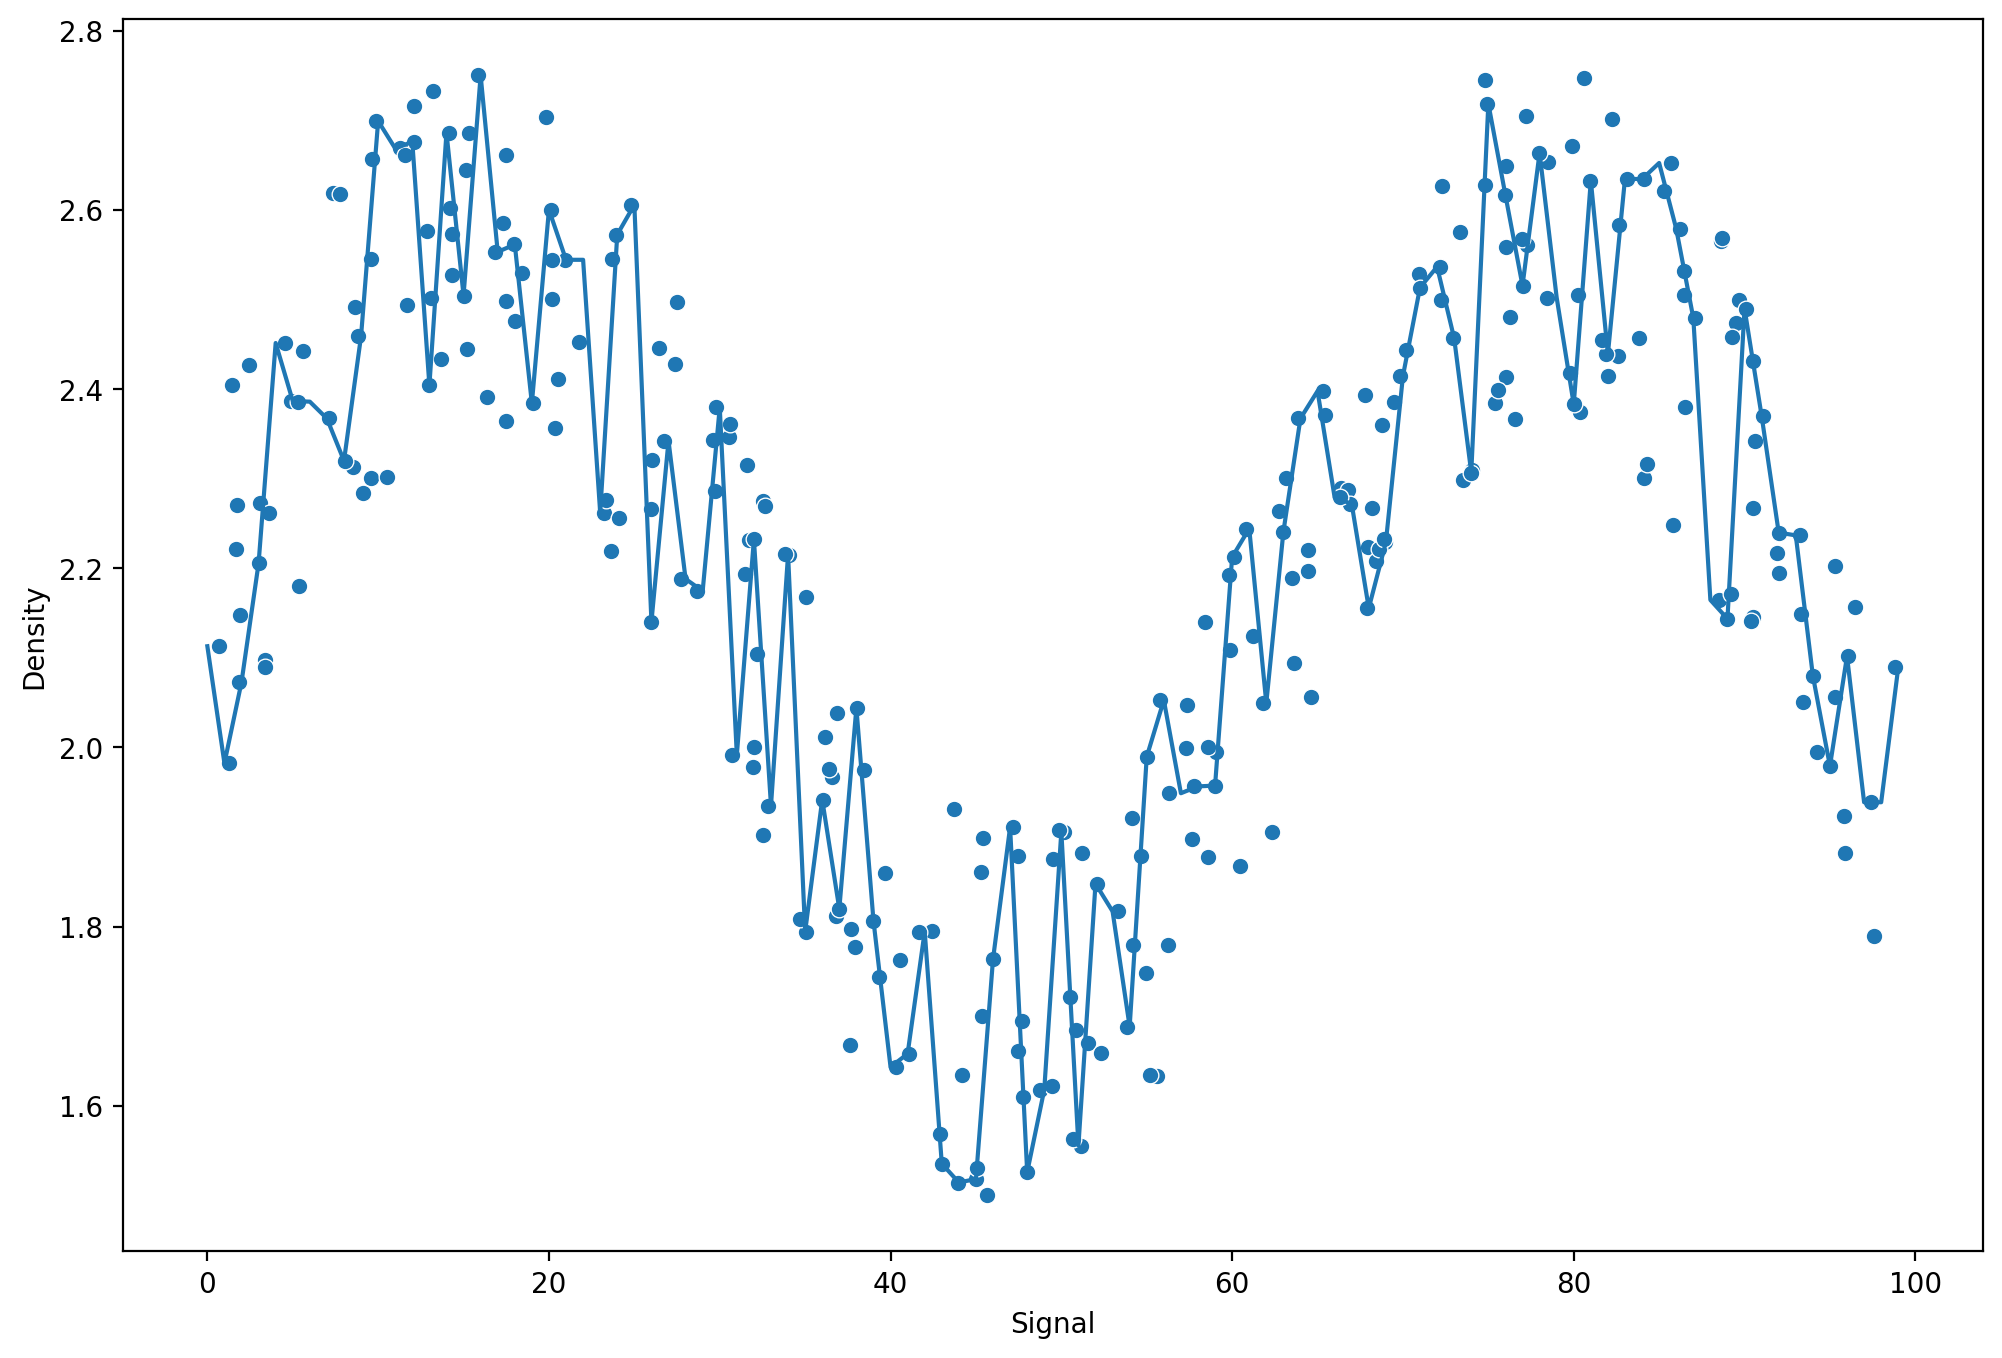

In [24]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
run_model(model,X_train,X_test,y_train,y_test)

RMSE : 0.13531977519510527
MAE : 0.11877940198757027


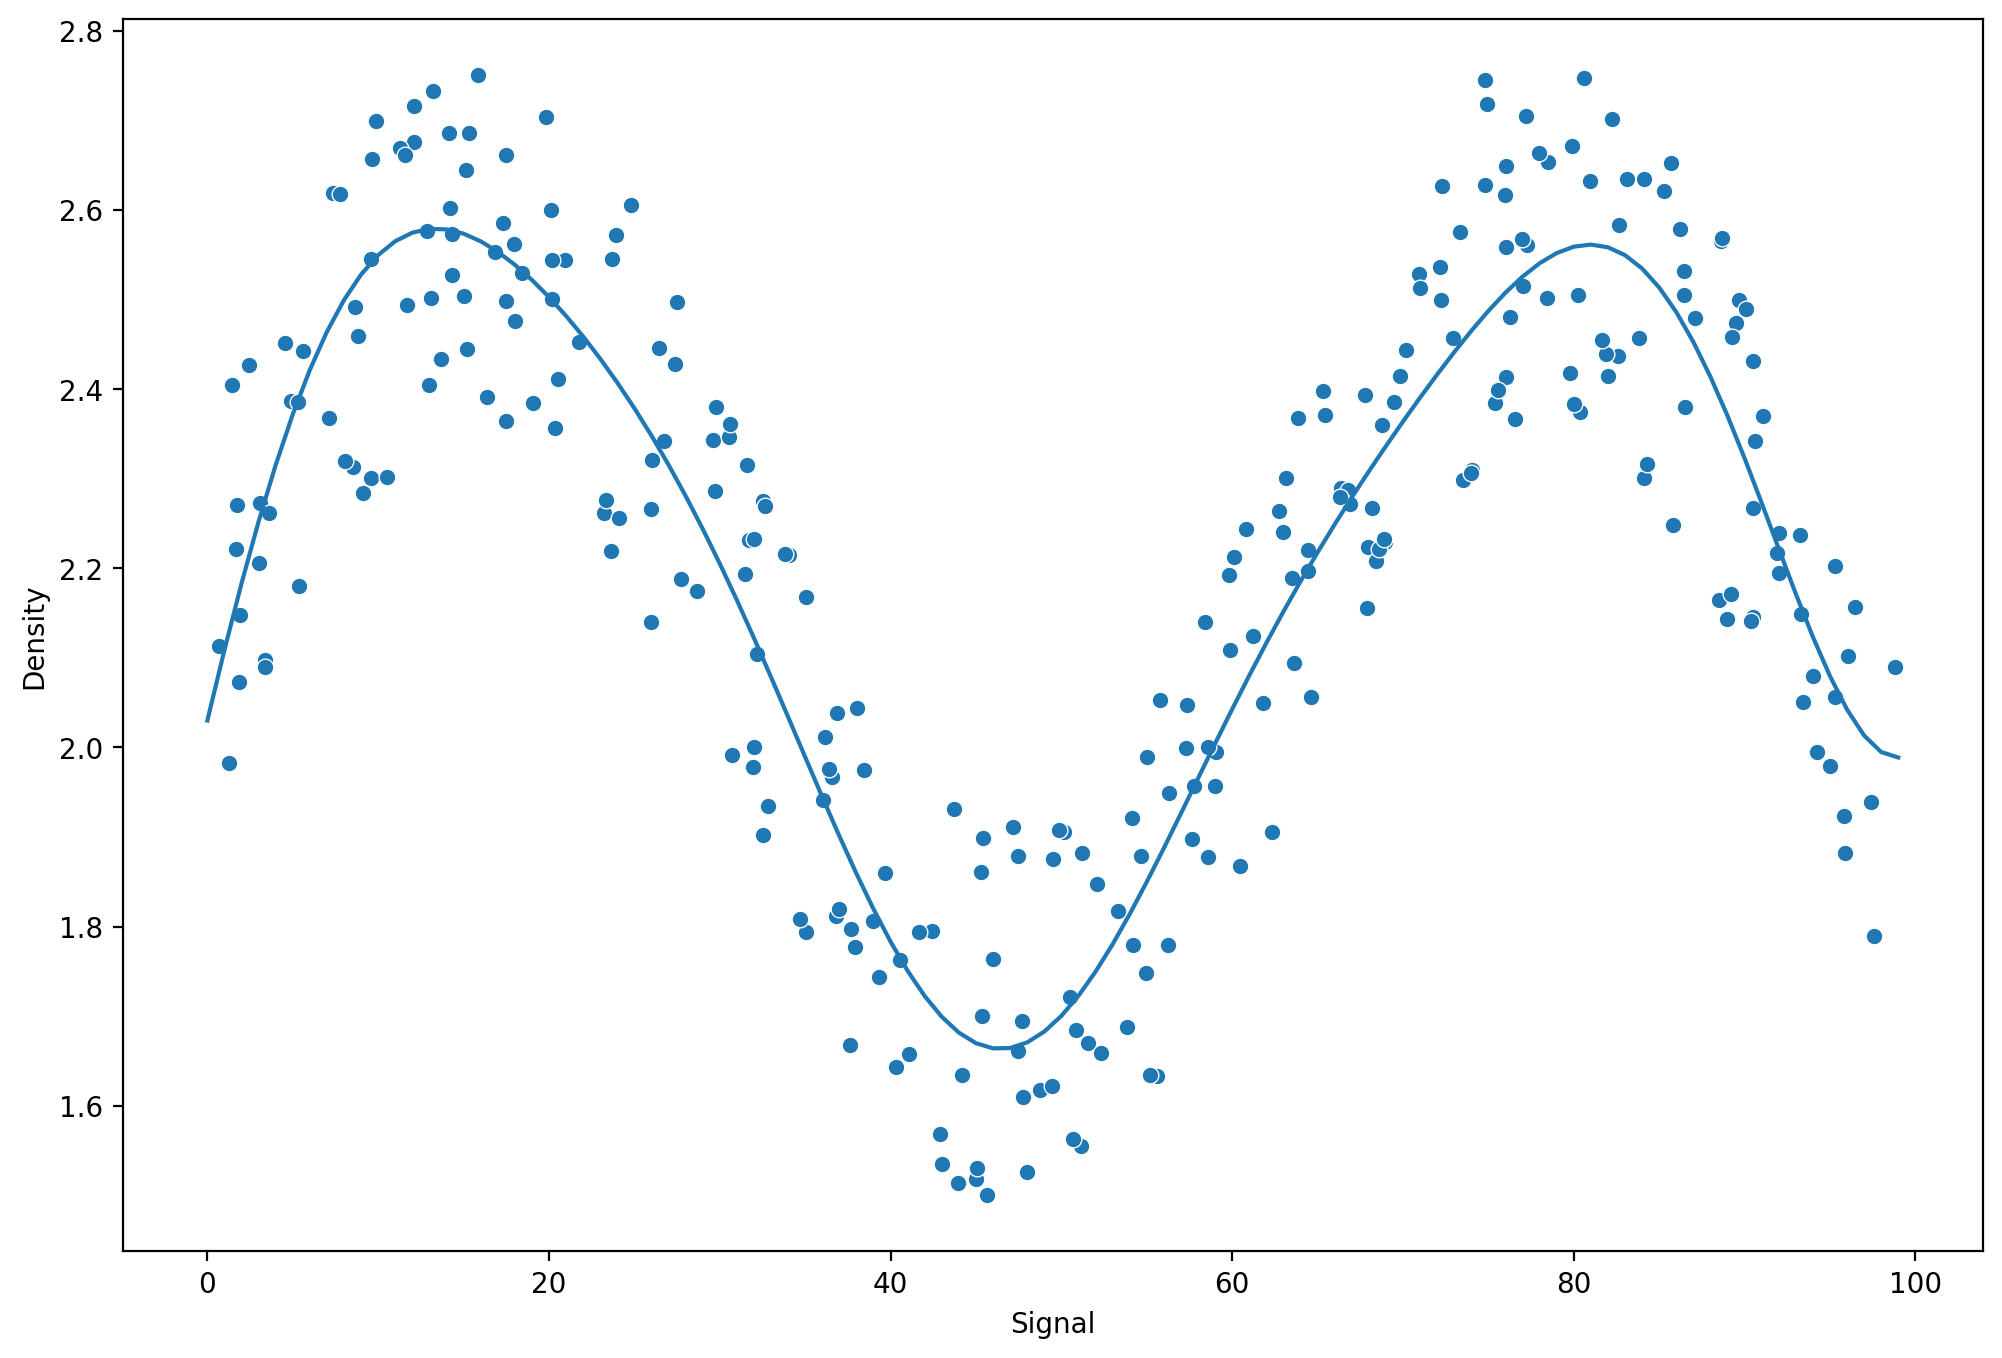

In [27]:
#Support Vector Machines
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVR(),param_grid = {'C' : [0.01,0.1,0.5,1,5,10,100,1000],
                                        'gamma' : ['auto','scale']})
run_model(grid,X_train,X_test,y_train,y_test)

RMSE : 0.14764329386106506
MAE : 0.12274935327541361


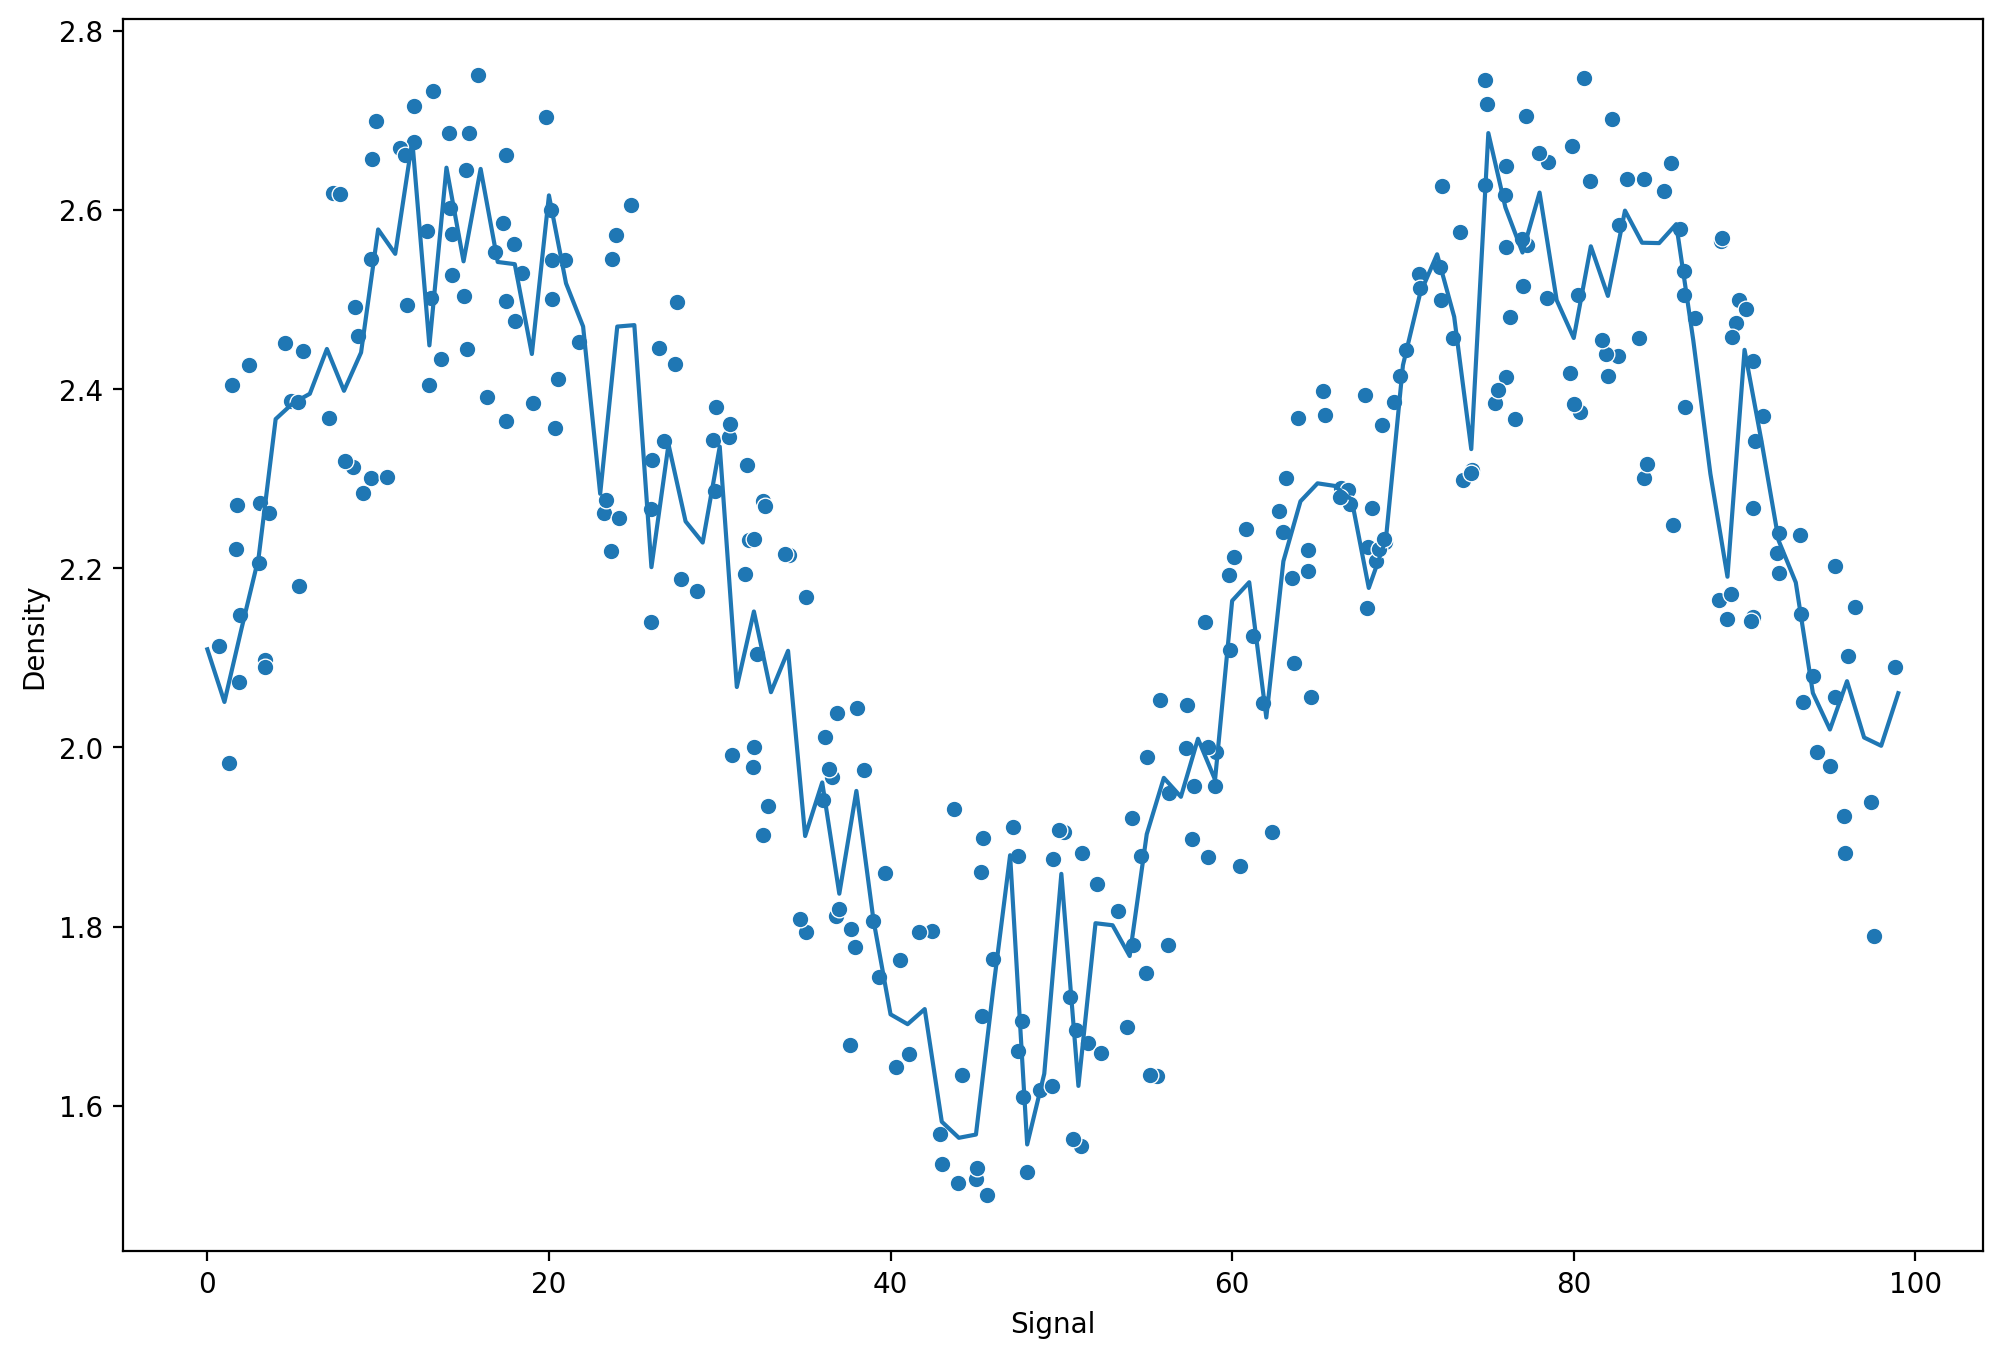

In [28]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
run_model(model,X_train,X_test,y_train,y_test)

RMSE : 0.13760286116385637
MAE : 0.11768930972195804


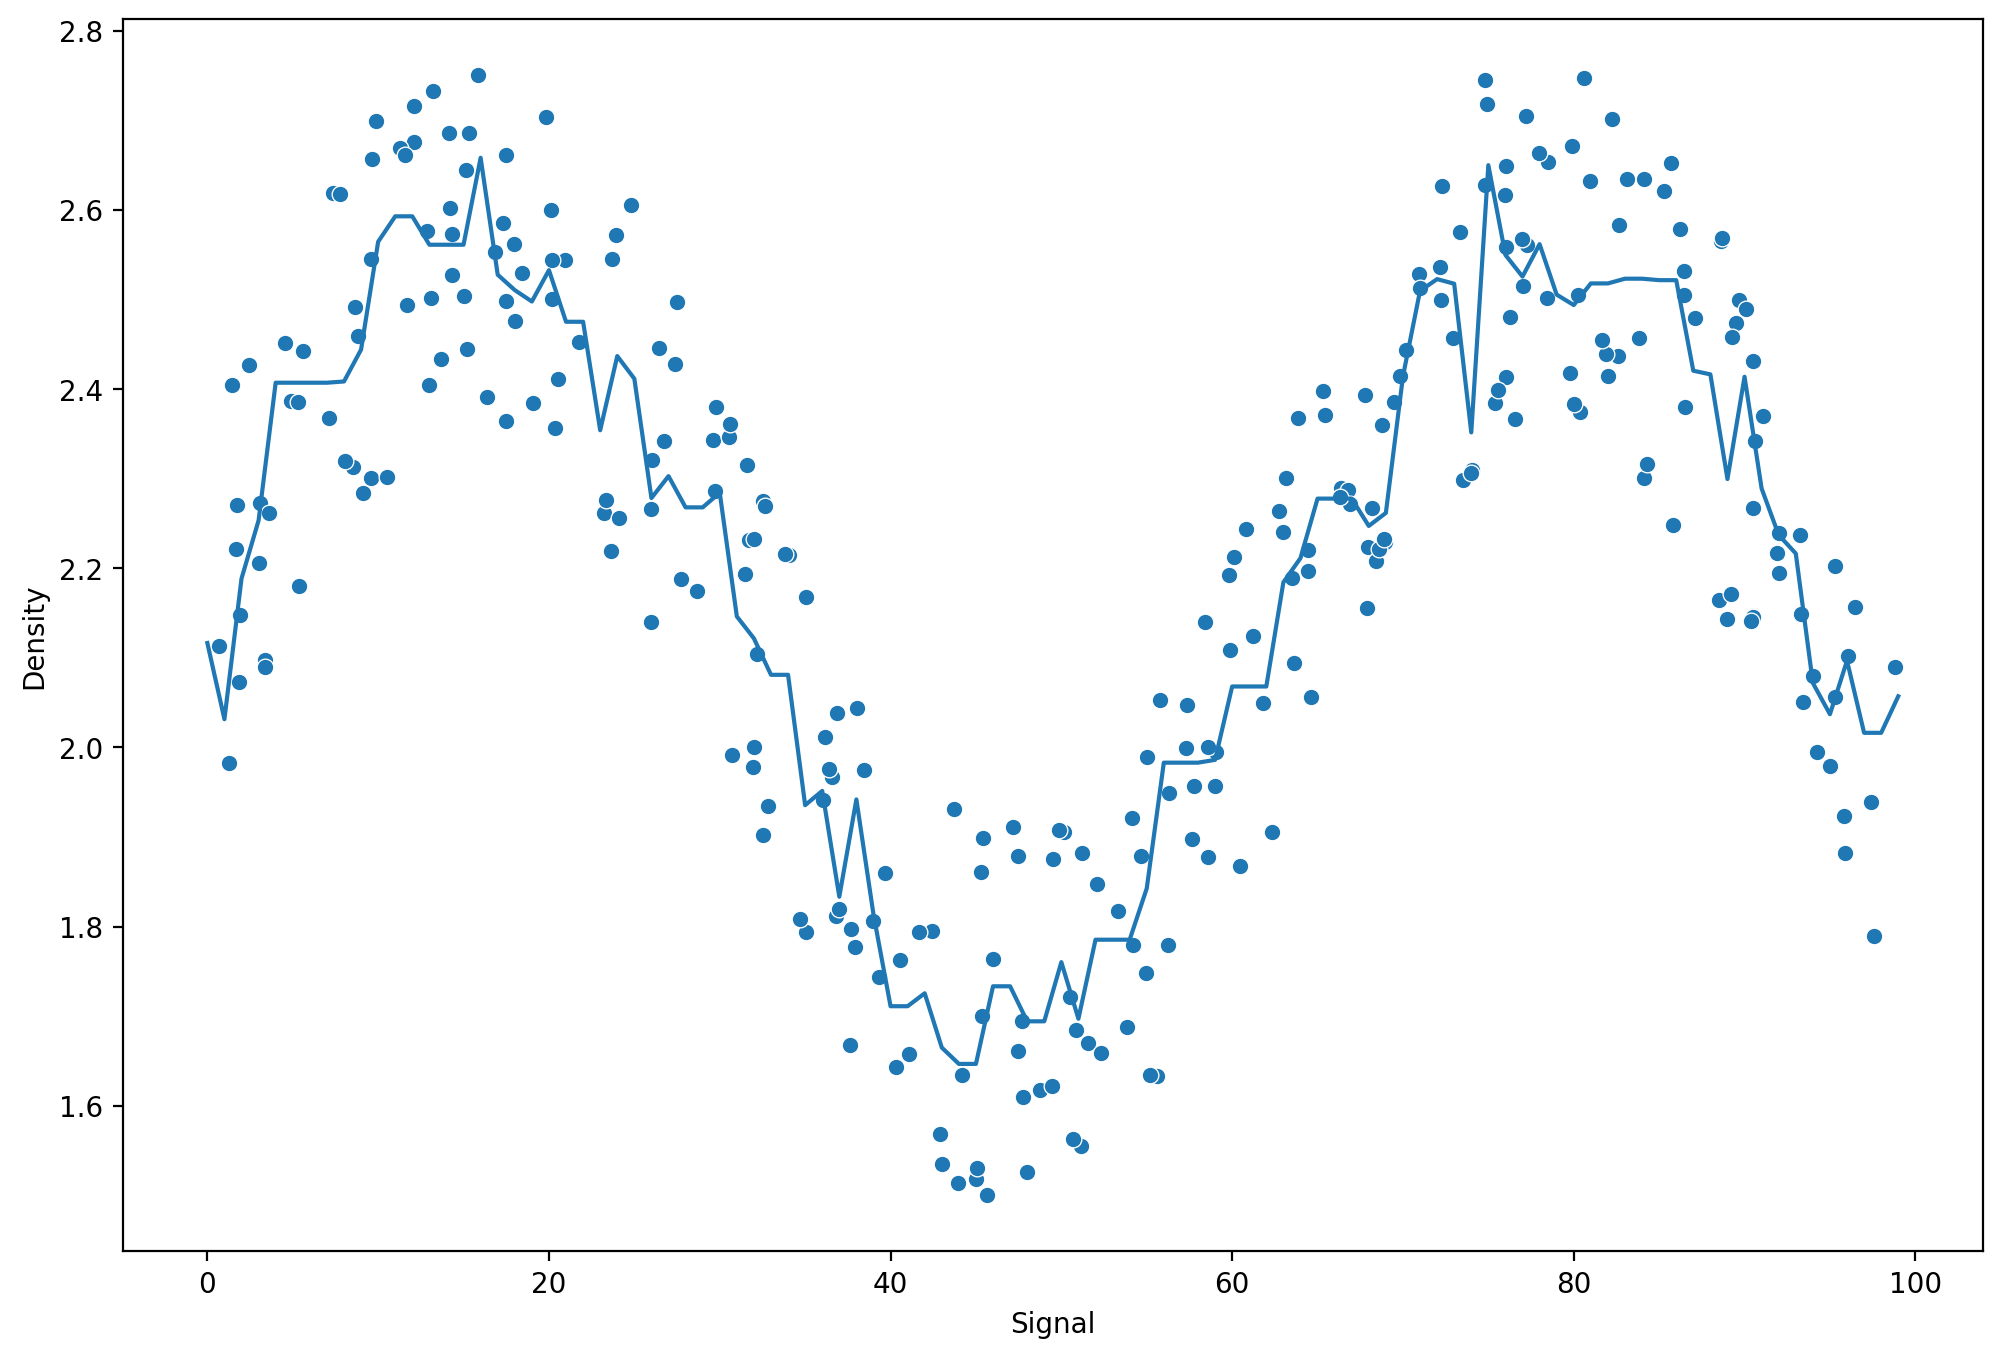

In [29]:
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor

model = GradientBoostingRegressor()
run_model(model,X_train,X_test,y_train,y_test)

RMSE : 0.13211185054039343
MAE : 0.11693182755318184


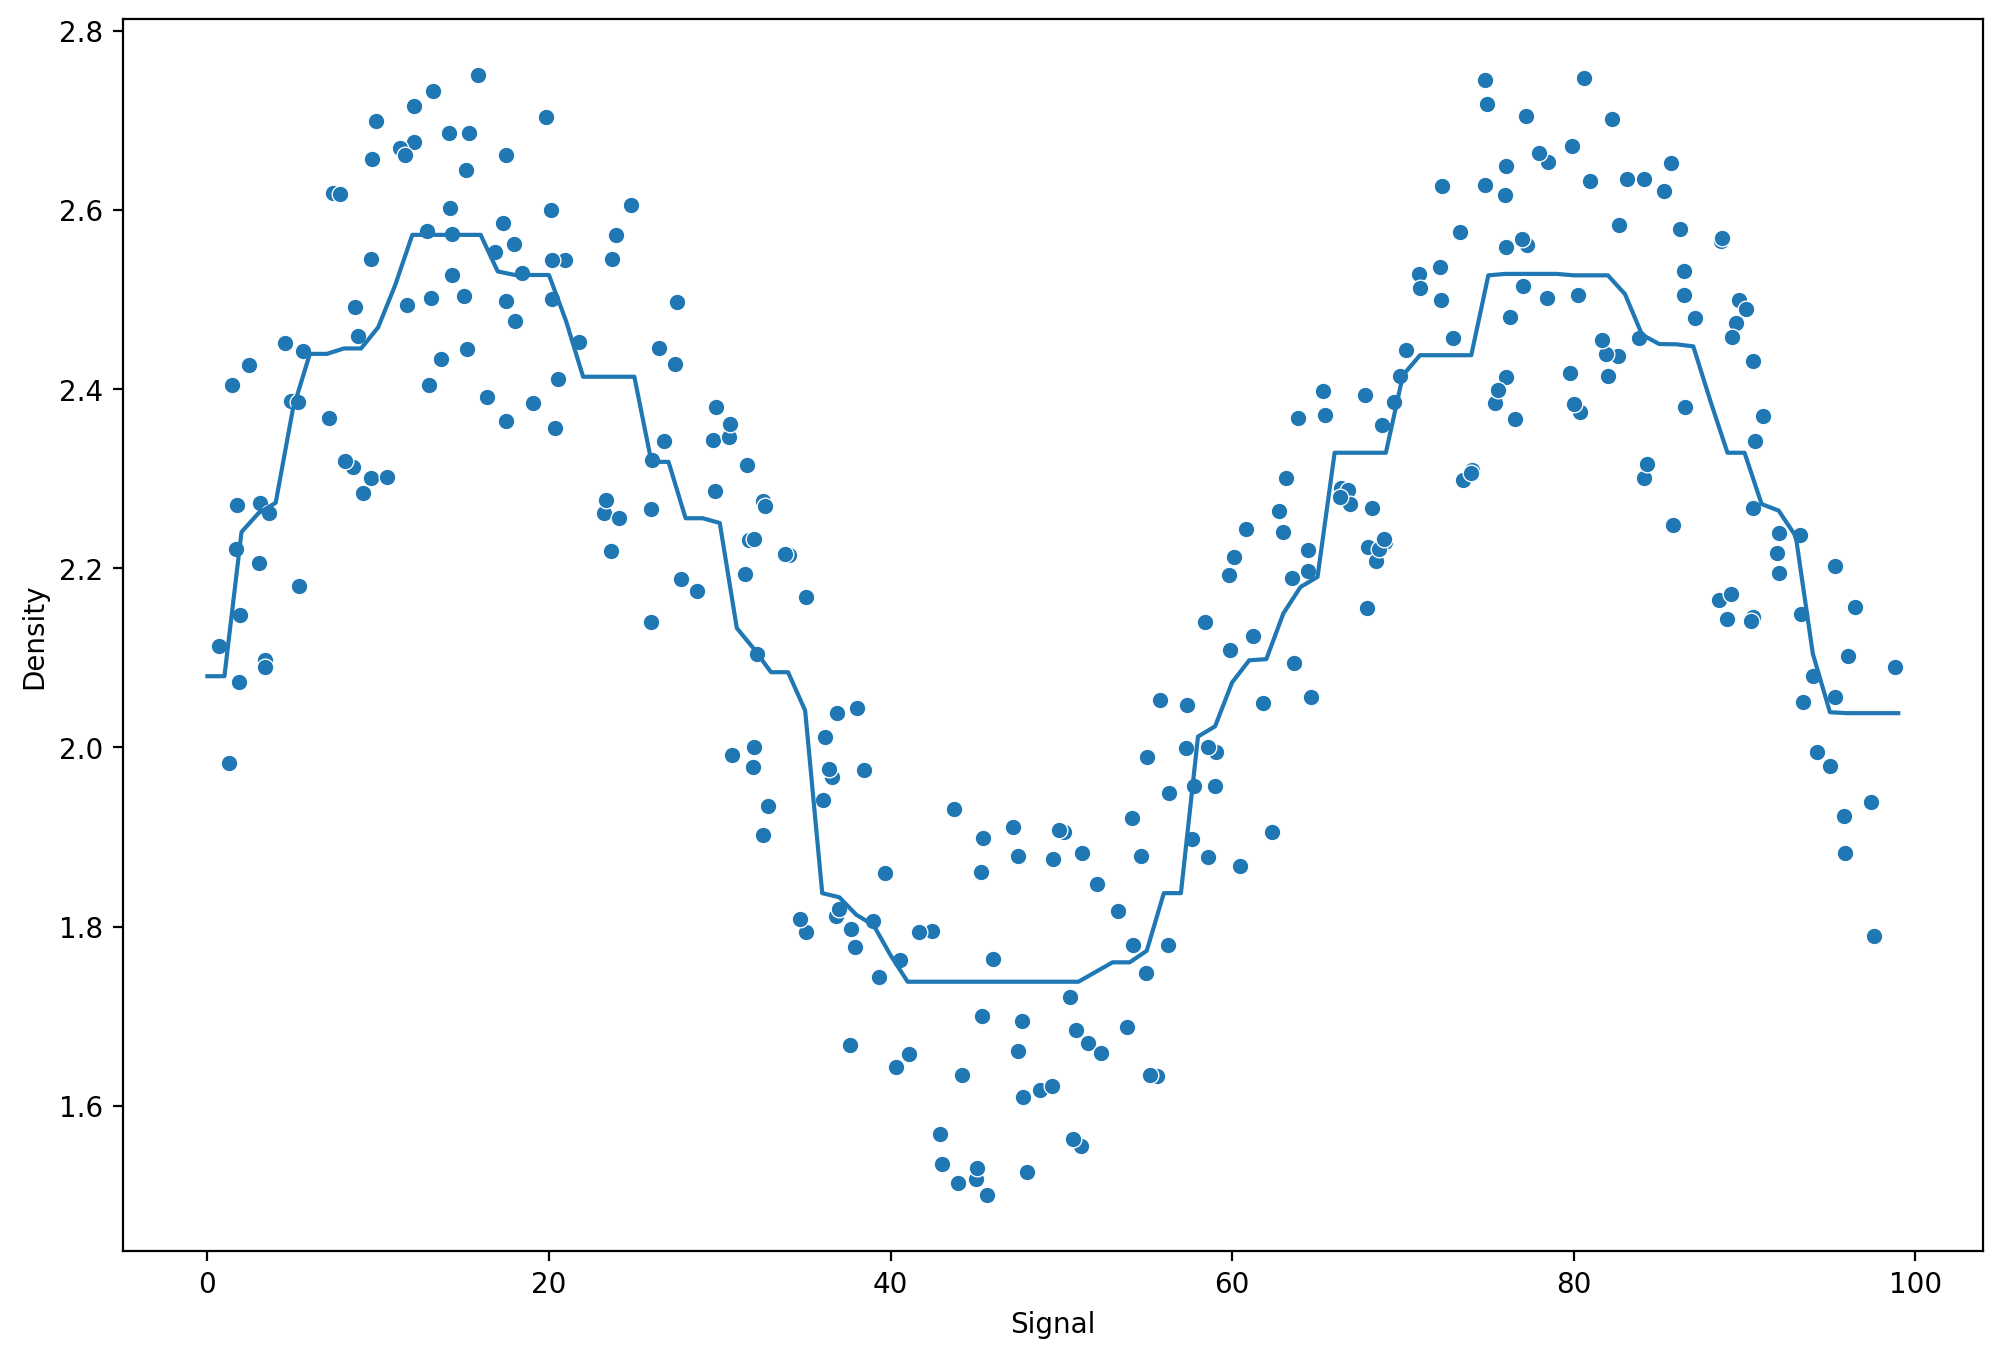

In [30]:
model = AdaBoostRegressor()
run_model(model,X_train,X_test,y_train,y_test)